___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
#visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix
from ipywidgets import interact
#data
import numpy as np
import pandas as pd
#tensorflow/keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation
#sklearn
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, MaxAbsScaler, PowerTransformer, QuantileTransformer, Normalizer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from category_encoders import BinaryEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
#optimization
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna
#model saving
import pickle
from tensorflow.keras.models import load_model

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [3]:
df = pd.read_csv('1-Churn_Modelling.csv')
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
#dropping features that dont help with modeling
df_prep = df.copy()
df_prep.drop(columns = ['RowNumber', 'CustomerId', 'Surname'], inplace = True)
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [7]:
df_prep.shape

(10000, 11)

In [8]:
df_prep.describe().T

count           mean           std     min       25%  \
CreditScore      10000.0     650.528800     96.653299  350.00    584.00   
Age              10000.0      38.921800     10.487806   18.00     32.00   
Tenure           10000.0       5.012800      2.892174    0.00      3.00   
Balance          10000.0   76485.889288  62397.405202    0.00      0.00   
NumOfProducts    10000.0       1.530200      0.581654    1.00      1.00   
HasCrCard        10000.0       0.705500      0.455840    0.00      0.00   
IsActiveMember   10000.0       0.515100      0.499797    0.00      0.00   
EstimatedSalary  10000.0  100090.239881  57510.492818   11.58  51002.11   
Exited           10000.0       0.203700      0.402769    0.00      0.00   

                        50%          75%        max  
CreditScore         652.000     718.0000     850.00  
Age                  37.000      44.0000      92.00  
Tenure                5.000       7.0000      10.00  
Balance           97198.540  127644.2400  250898.09  
NumOfProducts         1.000       2.0000       4.00  
HasCrCard             1.000       1.0000       1.00  
IsActiveMember        1.000       1.0000       1.00  
EstimatedSalary  100193.915  149388.2475  199992.48  
Exited                0.000       0.0000       1.00

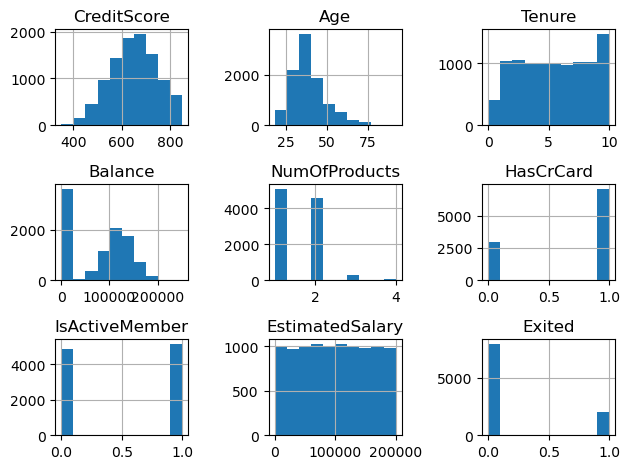

In [9]:
df_prep.hist()
plt.tight_layout();

No normally distributed values.

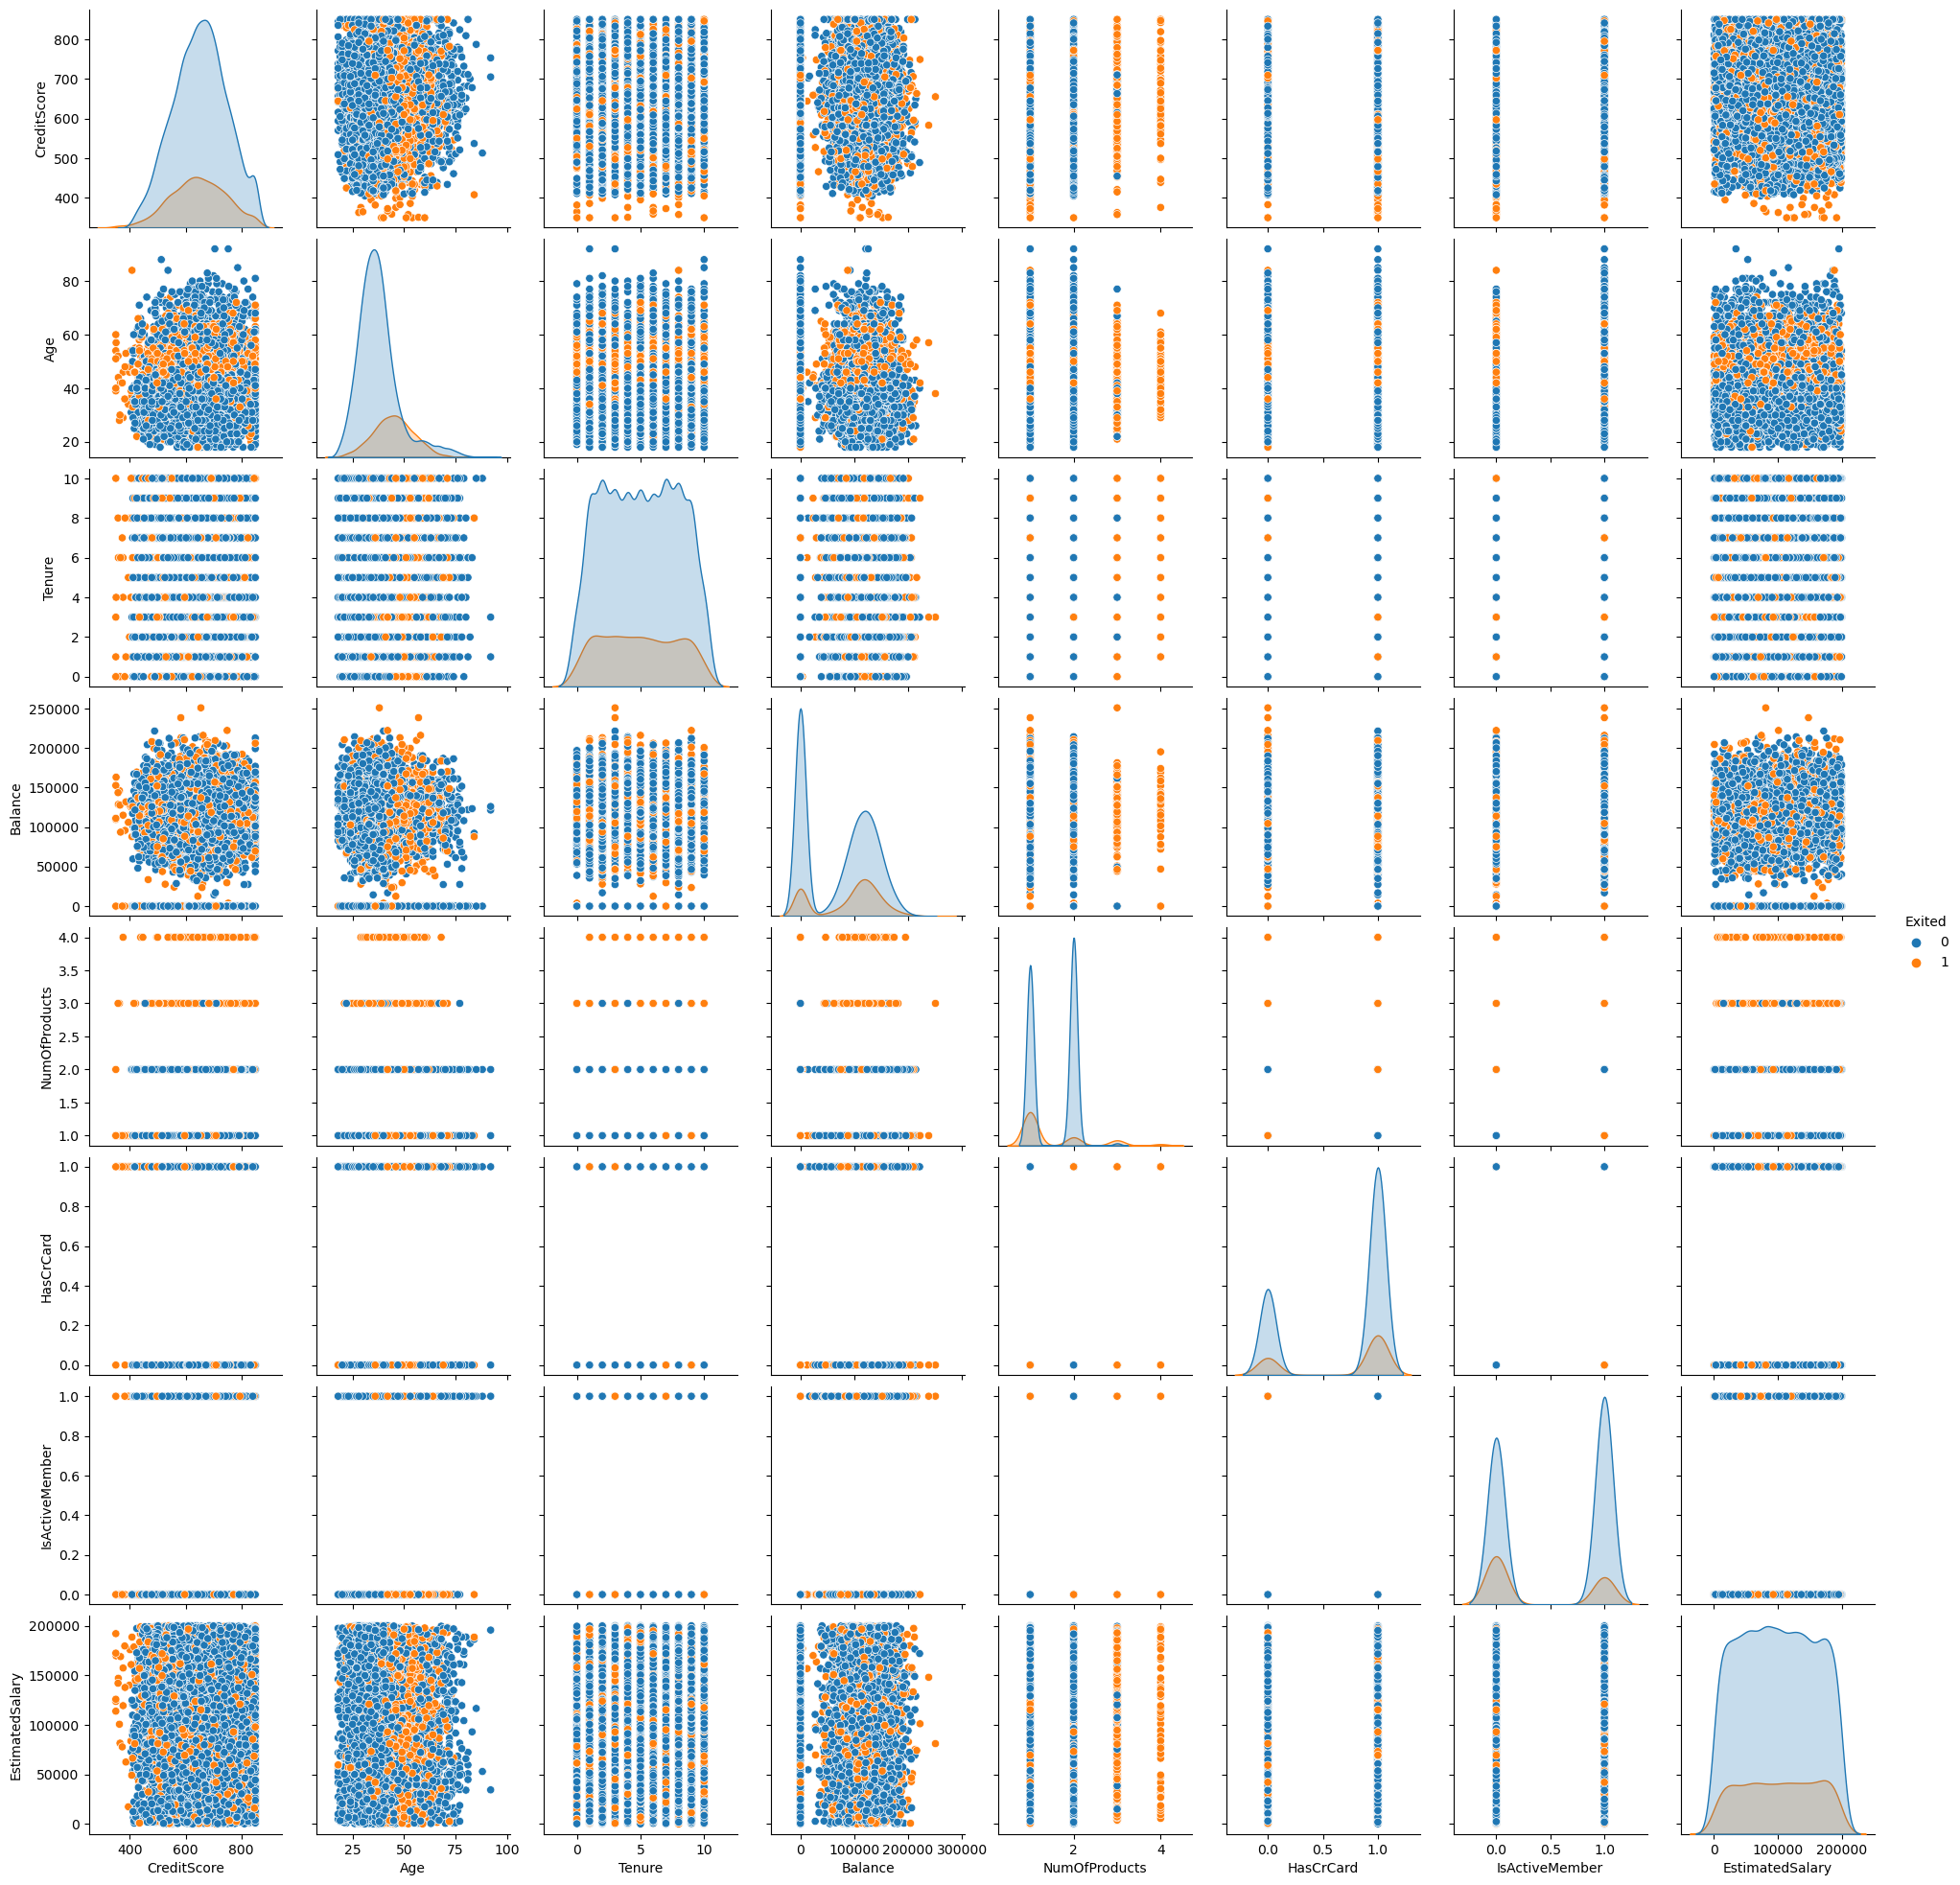

In [11]:
sns.pairplot(df_prep, hue = 'Exited');

Huge imbalance and overlab between the labels.

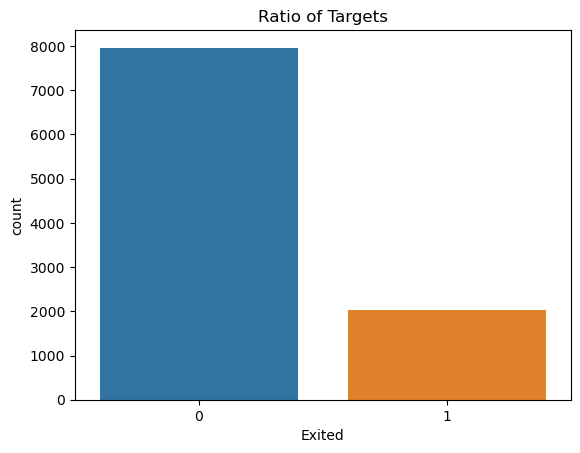

In [12]:
sns.countplot(df_prep, x="Exited")
plt.title('Ratio of Targets');

Need to deal with the imbalance issue.

In [13]:
def box_m(model):
    sns.boxplot(data = df_prep, x= "Exited", y = model)

interactive_df = df_prep.select_dtypes(include = 'number').columns[
    df_prep.select_dtypes(include = 'number').columns != 'Exited']

interact(box_m, model=interactive_df);

interactive(children=(Dropdown(description='model', options=('CreditScore', 'Age', 'Tenure', 'Balance', 'NumOf…

- The biggest difference between the the mean of the two labels are "Age" and "Balance".
- There is only one noticable outlier in "NumOfProducts".

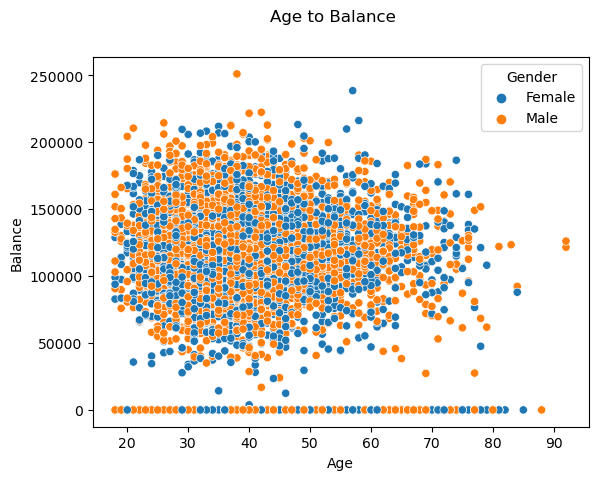

In [206]:
sns.scatterplot(data = df_prep, x = 'Age', y = 'Balance', hue = 'Gender')
plt.suptitle('Age to Balance');

Many customers have zero balance across all ages especially males.

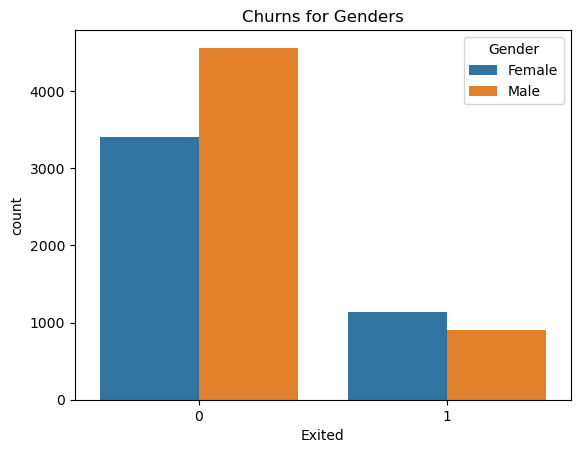

In [207]:
sns.countplot(data = df_prep, x = 'Exited', hue = 'Gender')
plt.title('Churns for Genders');

Females closed their accounts the most.

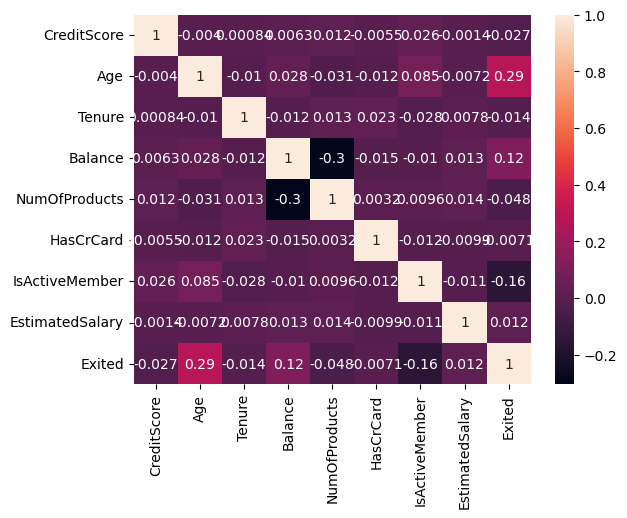

In [14]:
#correlation matrix
sns.heatmap(df_prep.corr(numeric_only = True), annot = True);

No multicollinearity.

In [15]:
df_prep.describe(include = 'object').T

count unique     top  freq
Geography  10000      3  France  5014
Gender     10000      2    Male  5457

- Only three unique values in "Geography" column.
- Use one-hot encoding for these features.

In [16]:
#exploring
df_prep['Geography'].value_counts() 

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [17]:
#preparing encoder/scaler
enc_onehot = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
cols_onehot = ['Geography', 'Gender']

minmax = MinMaxScaler()
cols_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [18]:
cols_trans = make_column_transformer((enc_onehot, cols_onehot), (minmax, cols_scale), 
                                     remainder='passthrough', verbose_feature_names_out=False)
cols_transformer = cols_trans.set_output(transform="pandas")

In [19]:
#preparing data
X = df_prep.drop(columns = ['Exited'])
y = df_prep['Exited']

# Preprocessing of Data
- Train | Test Split, Scalling

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,
                                                    stratify = y)

In [70]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 42,
                                                    stratify = y_train)

In [71]:
#scaling data
X_train_ready = cols_trans.fit_transform(X_train)
X_val_ready = cols_trans.transform(X_val)

In [23]:
#making an oversampled dataset
over = SMOTE(sampling_strategy='minority', random_state = 42)

In [72]:
X_train_os, y_train_os = over.fit_resample(X_train_ready, y_train)

In [73]:
print('Labels for normal data: \n',y_train.value_counts(),
      '\nLabels for oversampled data: \n', y_train_os.value_counts())

Labels for normal data: 
 0    5733
1    1467
Name: Exited, dtype: int64 
Labels for oversampled data: 
 1    5733
0    5733
Name: Exited, dtype: int64


# Modelling & Model Performance

In [37]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train) > 0.5
    y_pred = model.predict(X_test) > 0.5
    #y_train_pred = y_train_pred.astype(int)
    #y_pred = y_pred.astype(int)
    
    print("\tTest_Set\n")
    fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred), show_normed = True, figsize=(6, 6))
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()
    print(classification_report(y_test, y_pred))
    print()
    print("\tTrain_Set\n")
    fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_train, y_train_pred), show_normed = True, figsize=(6, 6))
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()
    print()
    print(classification_report(y_train, y_train_pred))

## without class_weigth

### Create The Model

In [135]:
def create_m(x, dropping = False):
    tf.random.set_seed(42)
    model = Sequential()
#relu gives the best results
    if dropping == True:
        model.add(Dense(units=40, activation="relu", input_dim=x.shape[1]))
        model.add(tf.keras.layers.Dropout(0.2))
        model.add(Dense(units = 20, activation="relu"))
        model.add(tf.keras.layers.Dropout(0.2))
        model.add(Dense(units = 10, activation="relu"))
        model.add(tf.keras.layers.Dropout(0.2))
        model.add(Dense(units = 5, activation="relu"))
        model.add(tf.keras.layers.Dropout(0.2))
        model.add(Dense(units=1, activation = 'sigmoid'))
    else: 
        model.add(Dense(units=40, activation="relu", input_dim=x.shape[1]))
        model.add(Dense(units=20, activation="relu"))
        model.add(Dense(units=10, activation="relu"))
        model.add(Dense(units=5, activation="relu"))
        model.add(Dense(units=1, activation = 'sigmoid'))
    return model

### without SMOTE

In [75]:
model = create_m(X_train_ready)

In [76]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 40)                560       
                                                                 
 dense_16 (Dense)            (None, 20)                820       
                                                                 
 dense_17 (Dense)            (None, 10)                210       
                                                                 
 dense_18 (Dense)            (None, 5)                 55        
                                                                 
 dense_19 (Dense)            (None, 1)                 6         
                                                                 
Total params: 1651 (6.45 KB)
Trainable params: 1651 (6.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [78]:
#drop accuracy since data is imbalanced 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.Recall()])

In [79]:

model.fit(x=X_train_ready, y=y_train, batch_size=50, epochs=1000, validation_data=(X_val_ready, y_val))


Epoch 1/1000
144/144 [==============================] - 1s 3ms/step - loss: 0.6386 - recall_4: 0.0961 - val_loss: 0.4992 - val_recall_4: 0.0000e+00
Epoch 2/1000
144/144 [==============================] - 0s 2ms/step - loss: 0.4766 - recall_4: 0.0164 - val_loss: 0.4582 - val_recall_4: 0.0184
Epoch 3/1000
144/144 [==============================] - 0s 2ms/step - loss: 0.4519 - recall_4: 0.1213 - val_loss: 0.4339 - val_recall_4: 0.2331
Epoch 4/1000
144/144 [==============================] - 0s 2ms/step - loss: 0.4363 - recall_4: 0.2018 - val_loss: 0.4188 - val_recall_4: 0.2086
Epoch 5/1000
144/144 [==============================] - 0s 2ms/step - loss: 0.4252 - recall_4: 0.2331 - val_loss: 0.4081 - val_recall_4: 0.2699
Epoch 6/1000
144/144 [==============================] - 0s 2ms/step - loss: 0.4017 - recall_4: 0.2918 - val_loss: 0.3675 - val_recall_4: 0.2883
Epoch 7/1000
144/144 [==============================] - 0s 2ms/step - loss: 0.3737 - recall_4: 0.3620 - val_loss: 0.3556 - val_recal

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

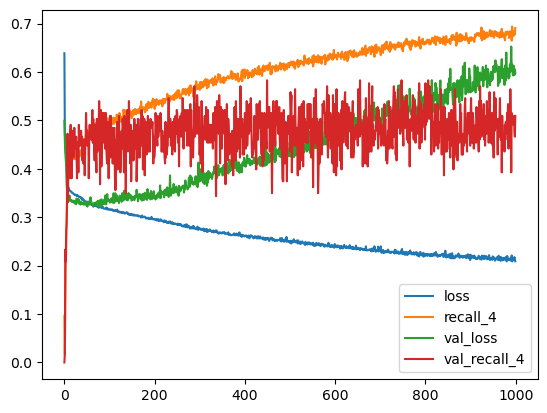

In [80]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [81]:
loss, accuracy = model.evaluate(X_val_ready, y_val, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.598608672618866
accuracy:  0.5092024803161621


25/25 [==============================] - 0s 1ms/step
	Test_Set



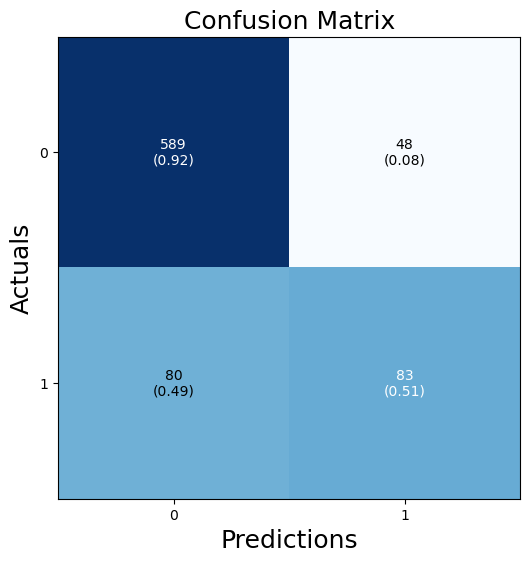

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       637
           1       0.63      0.51      0.56       163

    accuracy                           0.84       800
   macro avg       0.76      0.72      0.73       800
weighted avg       0.83      0.84      0.83       800


	Train_Set



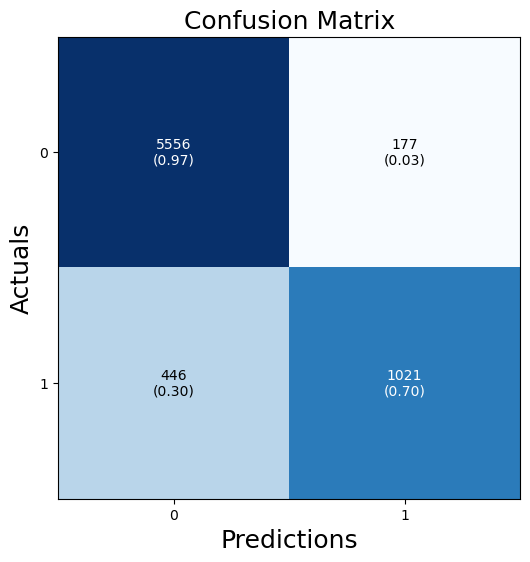


              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5733
           1       0.85      0.70      0.77      1467

    accuracy                           0.91      7200
   macro avg       0.89      0.83      0.86      7200
weighted avg       0.91      0.91      0.91      7200



In [82]:
eval_metric(model, X_train_ready, y_train, X_val_ready, y_val)

- Recall could be better for class 1.
- Overfitted model.

In [56]:
def roc_auc_plot(model, y_train, X_train, y_test, X_test):
    pred_train = model.predict(X_train) > 0.5
    pred_test = model.predict(X_test) > 0.5
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_train, pred_train)
    fpr_keras_test, tpr_keras_test, thresholds_keras_test = roc_curve(y_test, pred_test)


    auc_keras = auc(fpr_keras, tpr_keras)
    auc_keras_test = auc(fpr_keras_test, tpr_keras_test)


    plt.figure(1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_keras, tpr_keras, label='train (area = {:.3f})'.format(auc_keras))
    plt.plot(fpr_keras_test, tpr_keras_test, label='val (area = {:.3f})'.format(auc_keras_test))

    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

25/25 [==============================] - 0s 1ms/step


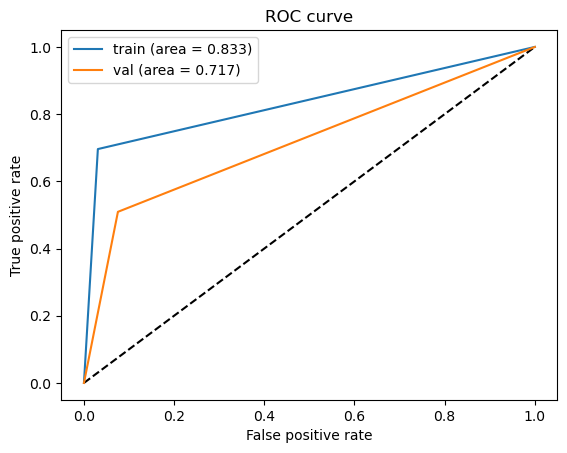

In [83]:
roc_auc_plot(model, y_train, X_train_ready, y_val, X_val_ready)

### oversample

In [84]:
model_os = create_m(X_train_os)

In [85]:
model_os.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.Recall()])

In [103]:
history_os = model_os.fit(x=X_train_os, y=y_train_os, batch_size=200, epochs=1000, validation_data=(X_val_ready, y_val))

Epoch 1/1000
58/58 [==============================] - 0s 3ms/step - loss: 0.1190 - recall_5: 0.9630 - val_loss: 1.2315 - val_recall_5: 0.5521
Epoch 2/1000
58/58 [==============================] - 0s 3ms/step - loss: 0.1177 - recall_5: 0.9635 - val_loss: 1.2260 - val_recall_5: 0.5644
Epoch 3/1000
58/58 [==============================] - 0s 3ms/step - loss: 0.1165 - recall_5: 0.9656 - val_loss: 1.2451 - val_recall_5: 0.5521
Epoch 4/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.1158 - recall_5: 0.9644 - val_loss: 1.2532 - val_recall_5: 0.5890
Epoch 5/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.1155 - recall_5: 0.9656 - val_loss: 1.2311 - val_recall_5: 0.5583
Epoch 6/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.1159 - recall_5: 0.9649 - val_loss: 1.2381 - val_recall_5: 0.5644
Epoch 7/1000
58/58 [==============================] - 0s 2ms/step - loss: 0.1160 - recall_5: 0.9646 - val_loss: 1.2388 - val_recall_5: 0.5644
Epoch 

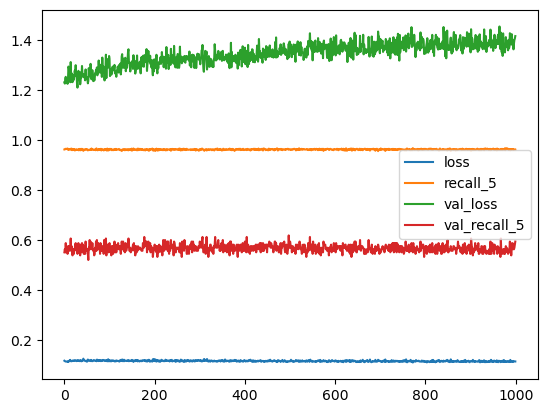

In [104]:
loss_df_os = pd.DataFrame(history_os.history)
loss_df_os.plot();

25/25 [==============================] - 0s 1ms/step
	Test_Set



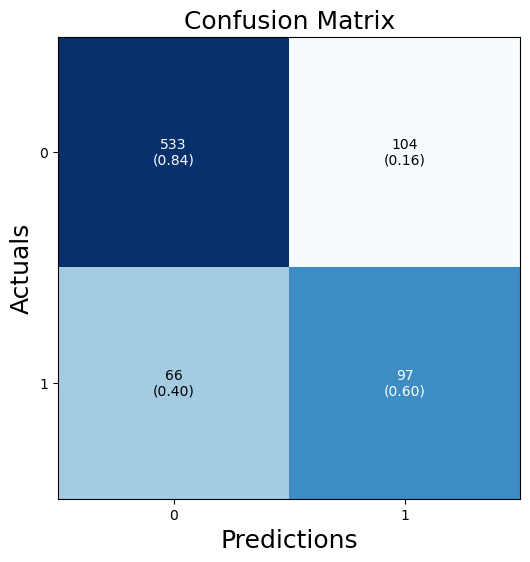

              precision    recall  f1-score   support

           0       0.89      0.84      0.86       637
           1       0.48      0.60      0.53       163

    accuracy                           0.79       800
   macro avg       0.69      0.72      0.70       800
weighted avg       0.81      0.79      0.80       800


	Train_Set



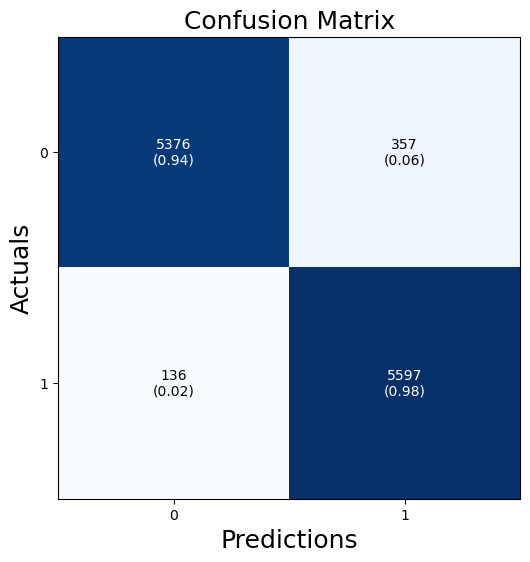


              precision    recall  f1-score   support

           0       0.98      0.94      0.96      5733
           1       0.94      0.98      0.96      5733

    accuracy                           0.96     11466
   macro avg       0.96      0.96      0.96     11466
weighted avg       0.96      0.96      0.96     11466



In [105]:
eval_metric(model_os, X_train_os, y_train_os, X_val_ready, y_val)

25/25 [==============================] - 0s 1ms/step


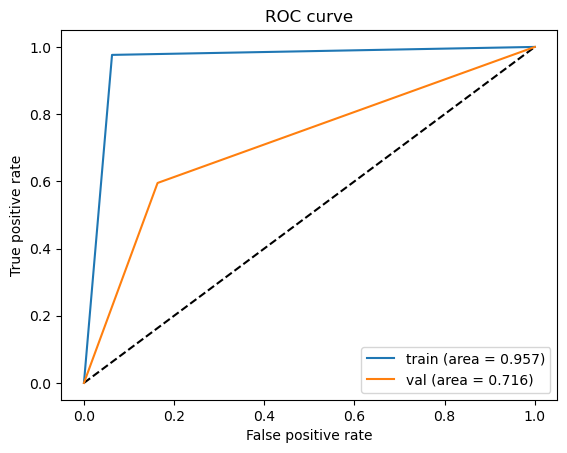

In [107]:
roc_auc_plot(model_os, y_train_os, X_train_os, y_val, X_val_ready)

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [108]:
model_w = create_m(X_train_ready)

In [109]:
model_w.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.Recall()])

In [115]:
#create a class weight dictionary 
class_weight = {0: 1, 1: 3.9}

In [116]:
history_w = model_w.fit(X_train_ready, y_train, batch_size=128, epochs=1000, class_weight=class_weight, validation_data=(X_val_ready, y_val))

Epoch 1/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.4906 - recall_6: 0.9318 - val_loss: 0.6647 - val_recall_6: 0.7362
Epoch 2/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.4712 - recall_6: 0.9216 - val_loss: 0.7109 - val_recall_6: 0.7362
Epoch 3/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.4623 - recall_6: 0.9237 - val_loss: 0.7249 - val_recall_6: 0.7301
Epoch 4/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.4562 - recall_6: 0.9380 - val_loss: 0.7744 - val_recall_6: 0.7117
Epoch 5/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.4325 - recall_6: 0.9366 - val_loss: 0.7475 - val_recall_6: 0.6994
Epoch 6/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.4385 - recall_6: 0.9387 - val_loss: 0.7383 - val_recall_6: 0.6626
Epoch 7/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.4510 - recall_6: 0.9291 - val_loss: 0.7019 - val_recall_6: 0.7362
Epoch 

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

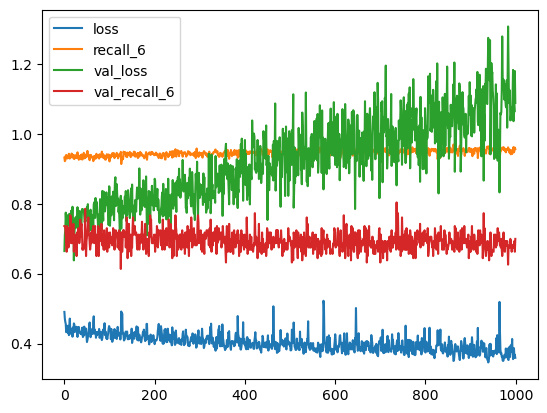

In [119]:
loss_df_w = pd.DataFrame(history_w.history)
loss_df_w.plot();

25/25 [==============================] - 0s 1ms/step
	Test_Set



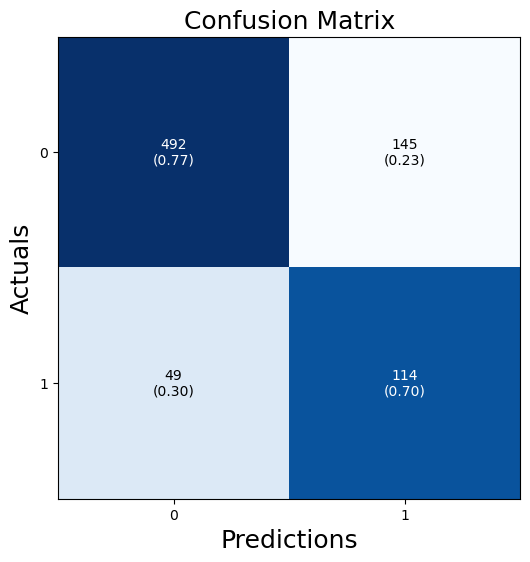

              precision    recall  f1-score   support

           0       0.91      0.77      0.84       637
           1       0.44      0.70      0.54       163

    accuracy                           0.76       800
   macro avg       0.67      0.74      0.69       800
weighted avg       0.81      0.76      0.78       800


	Train_Set



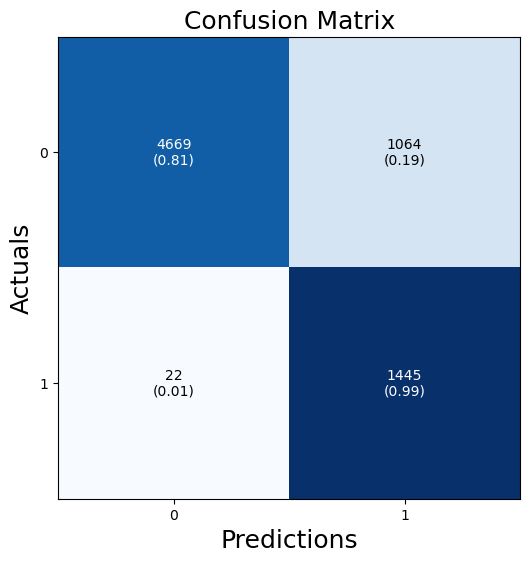


              precision    recall  f1-score   support

           0       1.00      0.81      0.90      5733
           1       0.58      0.99      0.73      1467

    accuracy                           0.85      7200
   macro avg       0.79      0.90      0.81      7200
weighted avg       0.91      0.85      0.86      7200



In [120]:
eval_metric(model_w, X_train_ready, y_train, X_val_ready, y_val)

25/25 [==============================] - 0s 1ms/step


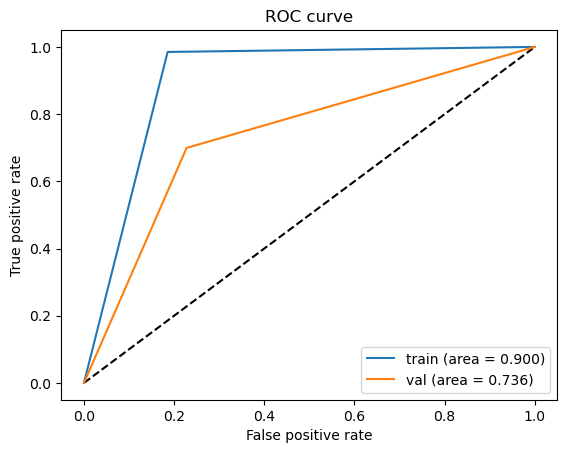

In [121]:
roc_auc_plot(model_w, y_train, X_train_ready, y_val, X_val_ready)

In [122]:
#oversampling
model_w_os = create_m(X_train_os)

In [123]:
#decided to focus on accuracy since datasets are balanced and weights are adjusted
model_w_os.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [124]:
history_w_os = model_w_os.fit(X_train_os, y_train_os, batch_size=128, epochs=500, class_weight=class_weight, validation_data=(X_val_ready, y_val))

Epoch 1/500
90/90 [==============================] - 1s 4ms/step - loss: 1.4000 - accuracy: 0.4979 - val_loss: 1.3289 - val_accuracy: 0.2037
Epoch 2/500
90/90 [==============================] - 0s 2ms/step - loss: 1.1696 - accuracy: 0.5000 - val_loss: 1.1810 - val_accuracy: 0.2037
Epoch 3/500
90/90 [==============================] - 0s 2ms/step - loss: 1.1167 - accuracy: 0.5000 - val_loss: 1.1575 - val_accuracy: 0.2037
Epoch 4/500
90/90 [==============================] - 0s 2ms/step - loss: 1.0694 - accuracy: 0.5038 - val_loss: 1.0652 - val_accuracy: 0.2688
Epoch 5/500
90/90 [==============================] - 0s 2ms/step - loss: 1.0230 - accuracy: 0.5673 - val_loss: 0.9896 - val_accuracy: 0.3837
Epoch 6/500
90/90 [==============================] - 0s 2ms/step - loss: 0.9793 - accuracy: 0.6243 - val_loss: 0.9950 - val_accuracy: 0.4288
Epoch 7/500
90/90 [==============================] - 0s 2ms/step - loss: 0.9405 - accuracy: 0.6551 - val_loss: 0.8925 - val_accuracy: 0.5063
Epoch 8/500
9

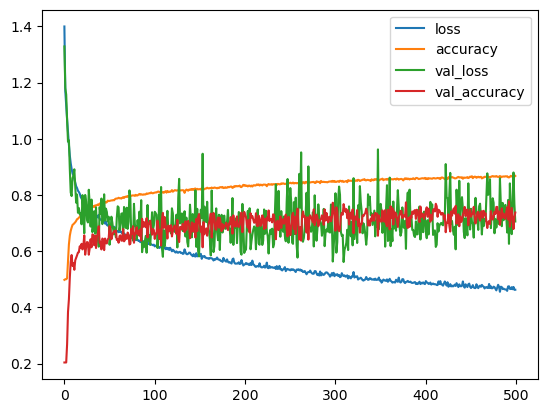

In [125]:
loss_df_w_os = pd.DataFrame(history_w_os.history)
loss_df_w_os.plot();

25/25 [==============================] - 0s 1ms/step
	Test_Set



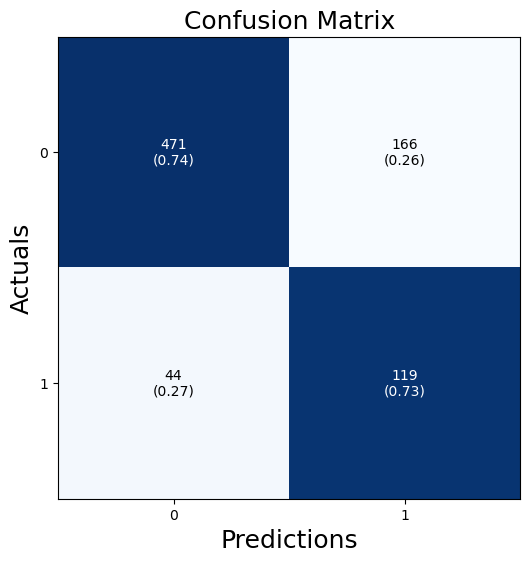

              precision    recall  f1-score   support

           0       0.91      0.74      0.82       637
           1       0.42      0.73      0.53       163

    accuracy                           0.74       800
   macro avg       0.67      0.73      0.67       800
weighted avg       0.81      0.74      0.76       800


	Train_Set



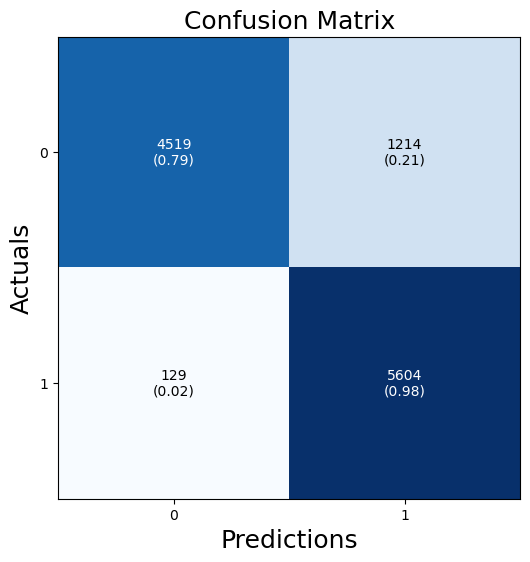


              precision    recall  f1-score   support

           0       0.97      0.79      0.87      5733
           1       0.82      0.98      0.89      5733

    accuracy                           0.88     11466
   macro avg       0.90      0.88      0.88     11466
weighted avg       0.90      0.88      0.88     11466



In [126]:
eval_metric(model_w_os, X_train_os, y_train_os, X_val_ready, y_val)

In [200]:
eval_metric(model_w_os, X_train_os, y_train_os, X_val_ready, y_val)

25/25 [==============================] - 0s 1ms/step


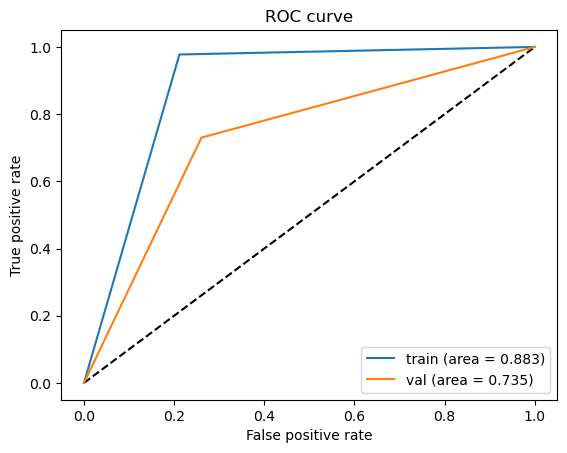

In [127]:
roc_auc_plot(model_w_os, y_train_os, X_train_os, y_val, X_val_ready)

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

In [129]:
lr_model = create_m(X_train_ready)

### Increase The Learning Rate and Observe The Results

In [130]:
lr_model.compile(tf.keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy',
                    metrics=[tf.keras.metrics.Recall()])

In [131]:
history_lr = lr_model.fit(X_train_ready, y_train, batch_size=128, epochs=500, class_weight = class_weight, validation_data=(X_val_ready, y_val))

Epoch 1/500
57/57 [==============================] - 1s 6ms/step - loss: 1.0298 - recall_7: 0.6217 - val_loss: 0.6252 - val_recall_7: 0.6687
Epoch 2/500
57/57 [==============================] - 0s 3ms/step - loss: 0.9509 - recall_7: 0.6776 - val_loss: 0.5618 - val_recall_7: 0.7178
Epoch 3/500
57/57 [==============================] - 0s 3ms/step - loss: 0.8650 - recall_7: 0.7096 - val_loss: 0.4817 - val_recall_7: 0.7914
Epoch 4/500
57/57 [==============================] - 0s 2ms/step - loss: 0.8057 - recall_7: 0.7232 - val_loss: 0.5264 - val_recall_7: 0.7914
Epoch 5/500
57/57 [==============================] - 0s 3ms/step - loss: 0.8203 - recall_7: 0.7355 - val_loss: 0.4342 - val_recall_7: 0.7055
Epoch 6/500
57/57 [==============================] - 0s 3ms/step - loss: 0.7775 - recall_7: 0.7212 - val_loss: 0.4041 - val_recall_7: 0.6748
Epoch 7/500
57/57 [==============================] - 0s 3ms/step - loss: 0.7663 - recall_7: 0.7307 - val_loss: 0.4348 - val_recall_7: 0.7301
Epoch 8/500
5

In [173]:
pred_train_lr = lr_model.predict(X_train_ready).ravel()
pred_test_lr = lr_model.predict(X_val_ready).ravel()

50/50 [==============================] - 0s 1ms/step


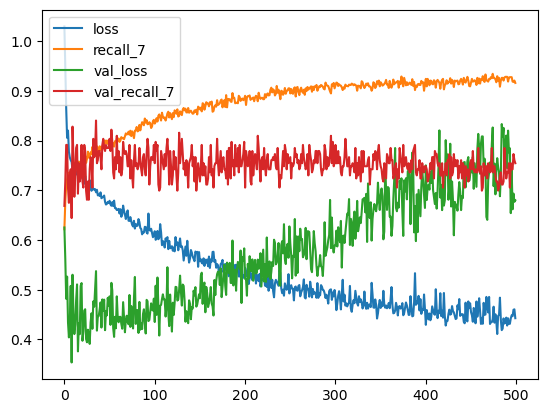

In [132]:
loss_df_lr = pd.DataFrame(history_lr.history)
loss_df_lr.plot();

25/25 [==============================] - 0s 1ms/step
	Test_Set



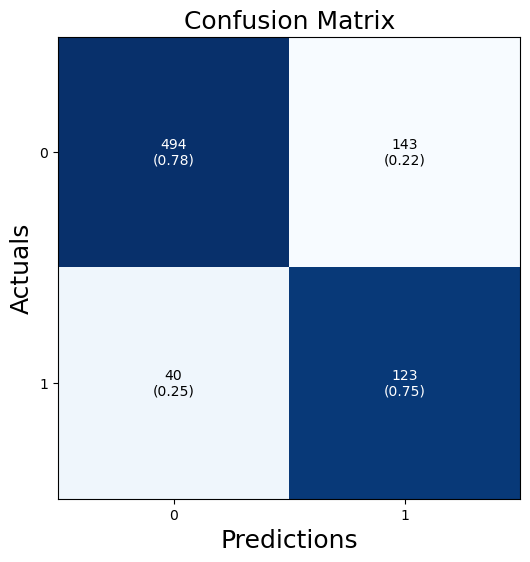

              precision    recall  f1-score   support

           0       0.93      0.78      0.84       637
           1       0.46      0.75      0.57       163

    accuracy                           0.77       800
   macro avg       0.69      0.77      0.71       800
weighted avg       0.83      0.77      0.79       800


	Train_Set



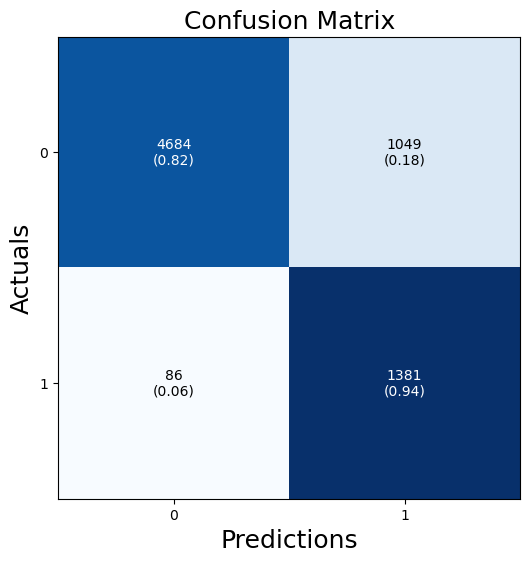


              precision    recall  f1-score   support

           0       0.98      0.82      0.89      5733
           1       0.57      0.94      0.71      1467

    accuracy                           0.84      7200
   macro avg       0.78      0.88      0.80      7200
weighted avg       0.90      0.84      0.85      7200



In [133]:
eval_metric(lr_model, X_train_ready, y_train, X_val_ready, y_val)

25/25 [==============================] - 0s 1ms/step


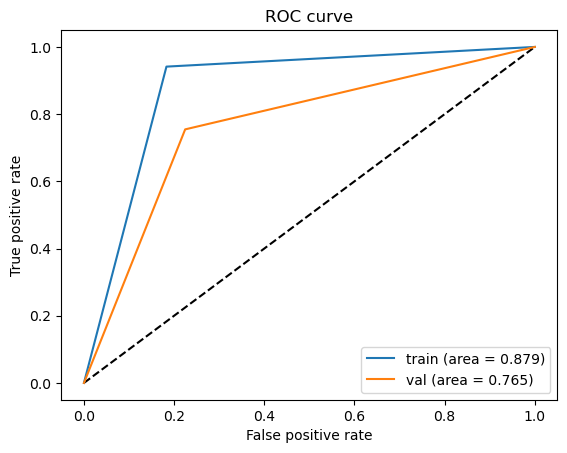

In [134]:
roc_auc_plot(lr_model, y_train, X_train_ready, y_val, X_val_ready)

In [144]:
lr_model_os = create_m(X_train_os)

In [145]:
lr_model_os.compile(tf.keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy',
                    metrics=['accuracy'])

In [146]:
history_lr_os = lr_model_os.fit(X_train_os, y_train_os, batch_size=128, epochs=1000, class_weight = class_weight, validation_data=(X_val_ready, y_val))

Epoch 1/1000
90/90 [==============================] - 1s 4ms/step - loss: 1.1408 - accuracy: 0.5067 - val_loss: 0.9290 - val_accuracy: 0.4363
Epoch 2/1000
90/90 [==============================] - 0s 2ms/step - loss: 0.9846 - accuracy: 0.6423 - val_loss: 0.8744 - val_accuracy: 0.5863
Epoch 3/1000
90/90 [==============================] - 0s 2ms/step - loss: 0.9154 - accuracy: 0.6861 - val_loss: 0.7137 - val_accuracy: 0.6037
Epoch 4/1000
90/90 [==============================] - 0s 2ms/step - loss: 0.8998 - accuracy: 0.6809 - val_loss: 0.8473 - val_accuracy: 0.5312
Epoch 5/1000
90/90 [==============================] - 0s 2ms/step - loss: 0.8845 - accuracy: 0.6951 - val_loss: 0.9842 - val_accuracy: 0.4762
Epoch 6/1000
90/90 [==============================] - 0s 2ms/step - loss: 0.8675 - accuracy: 0.7013 - val_loss: 1.0933 - val_accuracy: 0.4288
Epoch 7/1000
90/90 [==============================] - 0s 2ms/step - loss: 0.8531 - accuracy: 0.7020 - val_loss: 0.6791 - val_accuracy: 0.6388
Epoch 

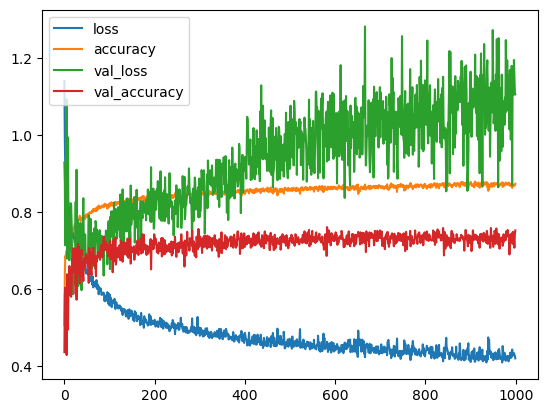

In [147]:
loss_df_lr_os = pd.DataFrame(history_lr_os.history)
loss_df_lr_os.plot();

25/25 [==============================] - 0s 1ms/step
	Test_Set



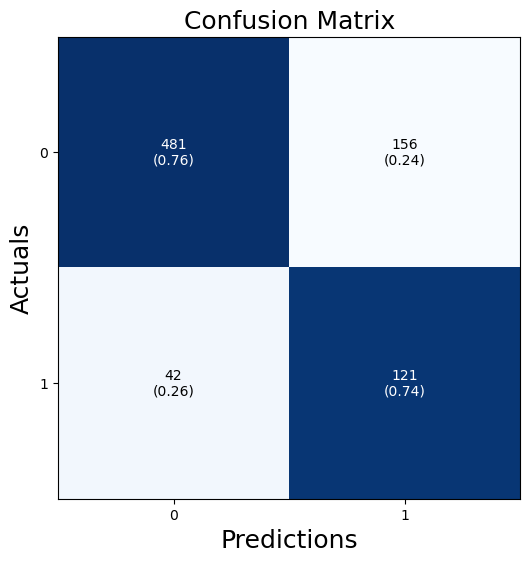

              precision    recall  f1-score   support

           0       0.92      0.76      0.83       637
           1       0.44      0.74      0.55       163

    accuracy                           0.75       800
   macro avg       0.68      0.75      0.69       800
weighted avg       0.82      0.75      0.77       800


	Train_Set



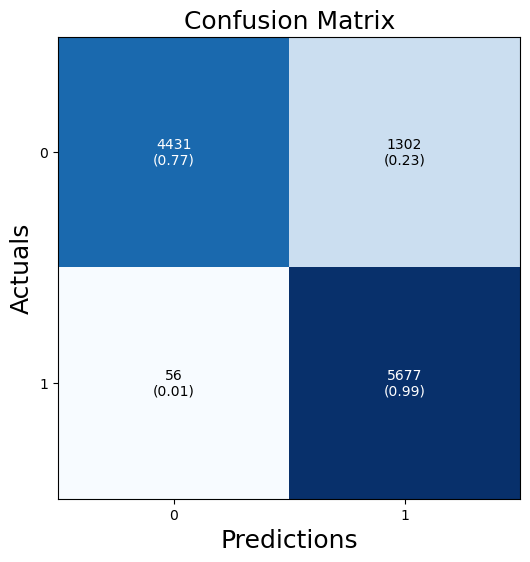


              precision    recall  f1-score   support

           0       0.99      0.77      0.87      5733
           1       0.81      0.99      0.89      5733

    accuracy                           0.88     11466
   macro avg       0.90      0.88      0.88     11466
weighted avg       0.90      0.88      0.88     11466



In [148]:
eval_metric(lr_model_os, X_train_os, y_train_os, X_val_ready, y_val)

25/25 [==============================] - 0s 1ms/step


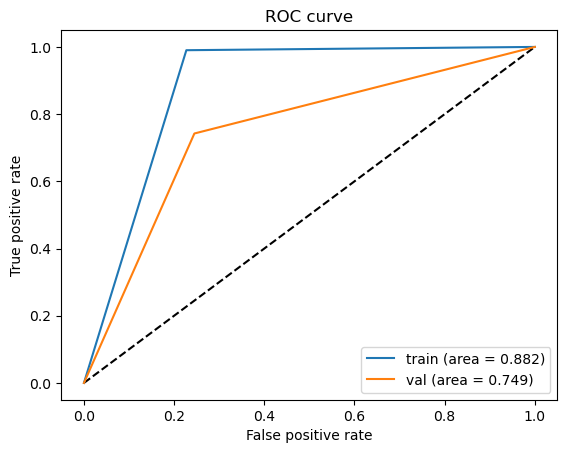

In [149]:
roc_auc_plot(lr_model_os, y_train_os, X_train_os, y_val, X_val_ready)

### Add Dropout Layer

In [150]:
#fixing the overfitting problem
dropout_m = create_m(X_train_ready, dropping = True)

In [151]:
dropout_m.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.Recall()])

In [152]:
history_dropout = dropout_m.fit(x=X_train_ready, y=y_train, batch_size=128, epochs=1000,
                                class_weight = class_weight, validation_data=(X_val_ready, y_val))

Epoch 1/1000
57/57 [==============================] - 2s 6ms/step - loss: 1.1054 - recall_8: 0.5037 - val_loss: 0.6624 - val_recall_8: 0.5153
Epoch 2/1000
57/57 [==============================] - 0s 3ms/step - loss: 1.0730 - recall_8: 0.5862 - val_loss: 0.6631 - val_recall_8: 0.6135
Epoch 3/1000
57/57 [==============================] - 0s 3ms/step - loss: 1.0586 - recall_8: 0.5746 - val_loss: 0.6545 - val_recall_8: 0.5767
Epoch 4/1000
57/57 [==============================] - 0s 3ms/step - loss: 1.0524 - recall_8: 0.5515 - val_loss: 0.6534 - val_recall_8: 0.6380
Epoch 5/1000
57/57 [==============================] - 0s 3ms/step - loss: 1.0396 - recall_8: 0.5583 - val_loss: 0.6367 - val_recall_8: 0.6258
Epoch 6/1000
57/57 [==============================] - 0s 3ms/step - loss: 1.0332 - recall_8: 0.5501 - val_loss: 0.6254 - val_recall_8: 0.6380
Epoch 7/1000
57/57 [==============================] - 0s 3ms/step - loss: 1.0173 - recall_8: 0.5999 - val_loss: 0.6304 - val_recall_8: 0.6503
Epoch 

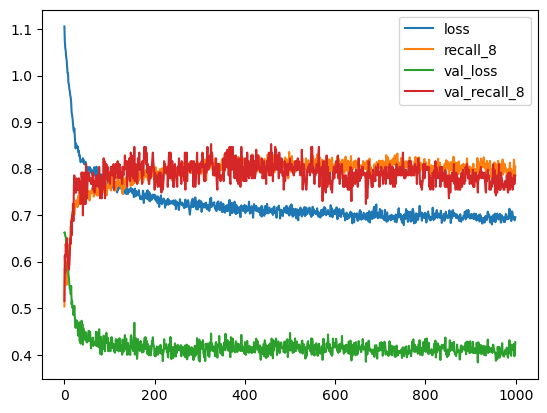

In [153]:
loss_df_dropout = pd.DataFrame(history_dropout.history)
loss_df_dropout.plot();

25/25 [==============================] - 0s 1ms/step
	Test_Set



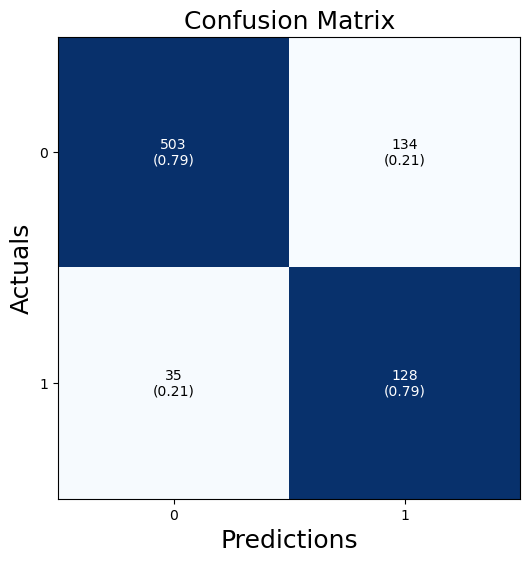

              precision    recall  f1-score   support

           0       0.93      0.79      0.86       637
           1       0.49      0.79      0.60       163

    accuracy                           0.79       800
   macro avg       0.71      0.79      0.73       800
weighted avg       0.84      0.79      0.80       800


	Train_Set



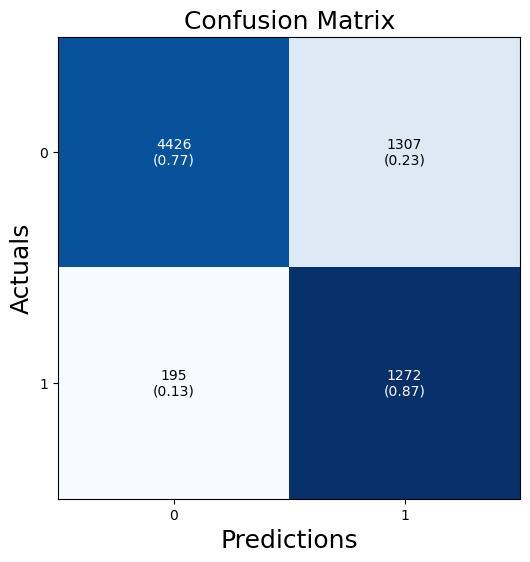


              precision    recall  f1-score   support

           0       0.96      0.77      0.85      5733
           1       0.49      0.87      0.63      1467

    accuracy                           0.79      7200
   macro avg       0.73      0.82      0.74      7200
weighted avg       0.86      0.79      0.81      7200



In [154]:
eval_metric(dropout_m, X_train_ready, y_train, X_val_ready, y_val)

25/25 [==============================] - 0s 1ms/step


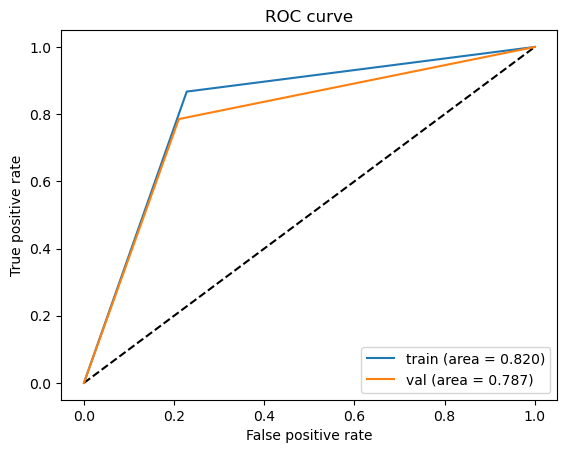

In [156]:
roc_auc_plot(dropout_m, y_train, X_train_ready, y_val, X_val_ready)

Model is less overfitted.

In [172]:
dropout_m_os = create_m(X_train_os, dropping = True)

In [173]:
dropout_m_os.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [174]:
history_dropout_os = dropout_m_os.fit(x=X_train_os, y=y_train_os, batch_size=128, epochs=1000,
                                class_weight = class_weight, validation_data=(X_val_ready, y_val))

Epoch 1/1000
90/90 [==============================] - 2s 5ms/step - loss: 1.6664 - accuracy: 0.4969 - val_loss: 0.7782 - val_accuracy: 0.2037
Epoch 2/1000
90/90 [==============================] - 0s 3ms/step - loss: 1.3825 - accuracy: 0.4992 - val_loss: 1.0607 - val_accuracy: 0.2037
Epoch 3/1000
90/90 [==============================] - 0s 3ms/step - loss: 1.2809 - accuracy: 0.5004 - val_loss: 1.0319 - val_accuracy: 0.2037
Epoch 4/1000
90/90 [==============================] - 0s 3ms/step - loss: 1.2273 - accuracy: 0.5046 - val_loss: 1.0834 - val_accuracy: 0.2062
Epoch 5/1000
90/90 [==============================] - 0s 3ms/step - loss: 1.1948 - accuracy: 0.5097 - val_loss: 1.1135 - val_accuracy: 0.2050
Epoch 6/1000
90/90 [==============================] - 0s 2ms/step - loss: 1.1894 - accuracy: 0.5141 - val_loss: 1.0560 - val_accuracy: 0.2138
Epoch 7/1000
90/90 [==============================] - 0s 3ms/step - loss: 1.1515 - accuracy: 0.5198 - val_loss: 1.0541 - val_accuracy: 0.2600
Epoch 

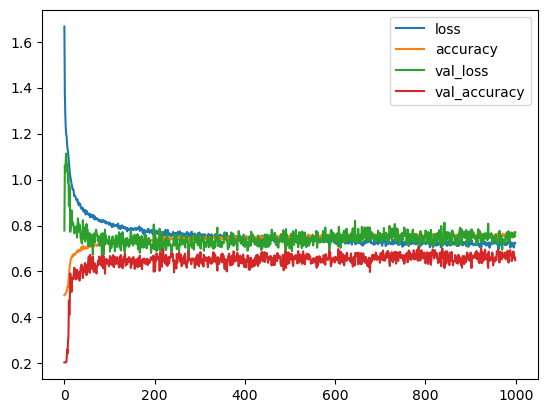

In [175]:
loss_df_dropout_os = pd.DataFrame(dropout_m_os.history.history)
loss_df_dropout_os.plot();

25/25 [==============================] - 0s 1ms/step
	Test_Set



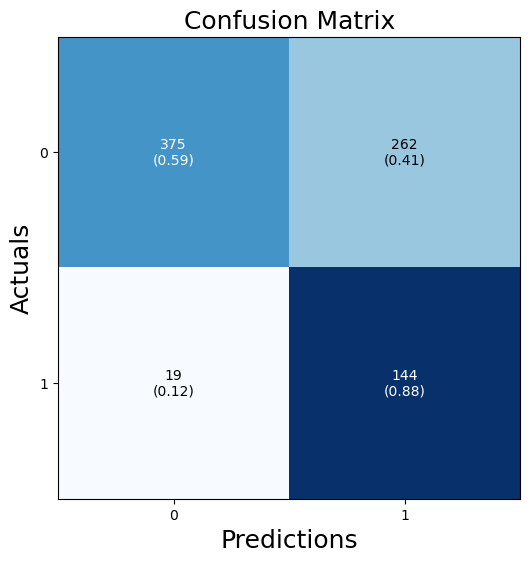

              precision    recall  f1-score   support

           0       0.95      0.59      0.73       637
           1       0.35      0.88      0.51       163

    accuracy                           0.65       800
   macro avg       0.65      0.74      0.62       800
weighted avg       0.83      0.65      0.68       800


	Train_Set



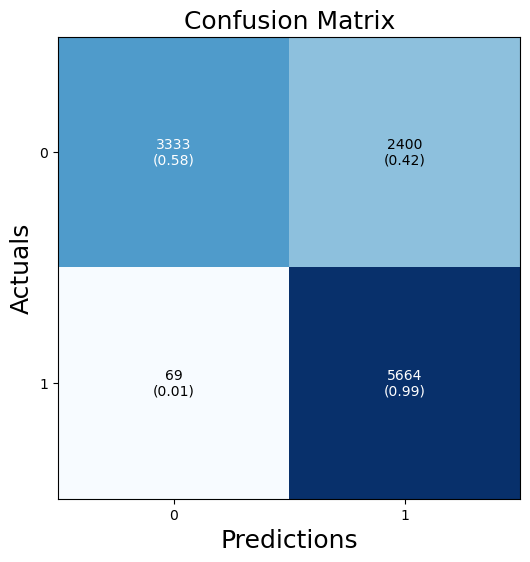


              precision    recall  f1-score   support

           0       0.98      0.58      0.73      5733
           1       0.70      0.99      0.82      5733

    accuracy                           0.78     11466
   macro avg       0.84      0.78      0.78     11466
weighted avg       0.84      0.78      0.78     11466



In [176]:
eval_metric(dropout_m_os, X_train_os, y_train_os, X_val_ready, y_val)

25/25 [==============================] - 0s 1ms/step


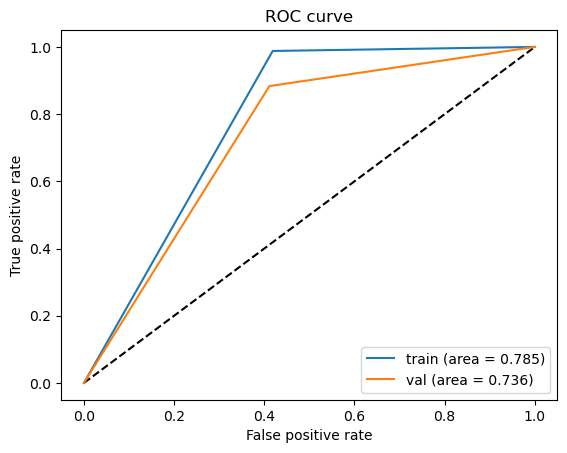

In [177]:
roc_auc_plot(dropout_m_os, y_train_os, X_train_os, y_val, X_val_ready)

### Add Early Stop

#### Monitor the "val_loss" as metric

In [157]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=25,
                                           restore_best_weights=True)

In [158]:
early_model = create_m(X_train_ready)

In [159]:
early_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.Recall()])

In [160]:
early_model.fit(x=X_train_ready, y=y_train, batch_size=128, epochs=1000, class_weight = class_weight,
            callbacks=[early_stop], validation_data=(X_val_ready, y_val))

Epoch 1/1000
57/57 [==============================] - 2s 7ms/step - loss: 1.0580 - recall_9: 0.4628 - val_loss: 0.6361 - val_recall_9: 0.6319
Epoch 2/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.9931 - recall_9: 0.6585 - val_loss: 0.6278 - val_recall_9: 0.6810
Epoch 3/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.9685 - recall_9: 0.6898 - val_loss: 0.6022 - val_recall_9: 0.6871
Epoch 4/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.9451 - recall_9: 0.6830 - val_loss: 0.5391 - val_recall_9: 0.6074
Epoch 5/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.9290 - recall_9: 0.6783 - val_loss: 0.5210 - val_recall_9: 0.6074
Epoch 6/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.9181 - recall_9: 0.6762 - val_loss: 0.5170 - val_recall_9: 0.6503
Epoch 7/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.9059 - recall_9: 0.6926 - val_loss: 0.4910 - val_recall_9: 0.6196
Epoch 

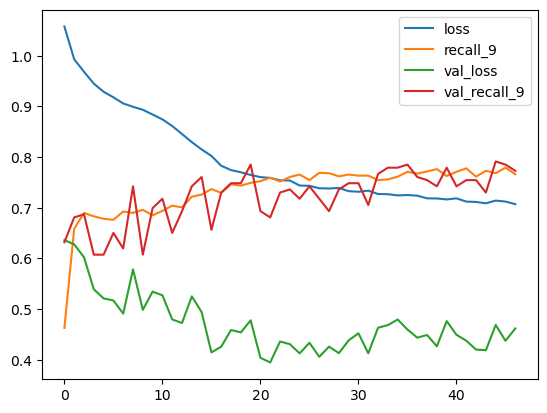

In [161]:
loss_df_early = pd.DataFrame(early_model.history.history)
loss_df_early.plot();

25/25 [==============================] - 0s 1ms/step
	Test_Set



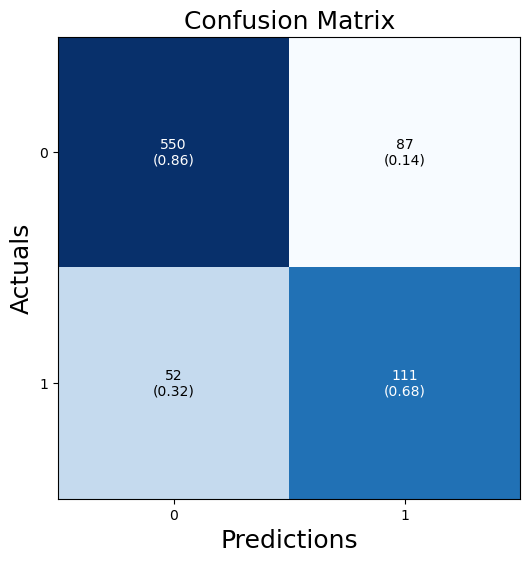

              precision    recall  f1-score   support

           0       0.91      0.86      0.89       637
           1       0.56      0.68      0.61       163

    accuracy                           0.83       800
   macro avg       0.74      0.77      0.75       800
weighted avg       0.84      0.83      0.83       800


	Train_Set



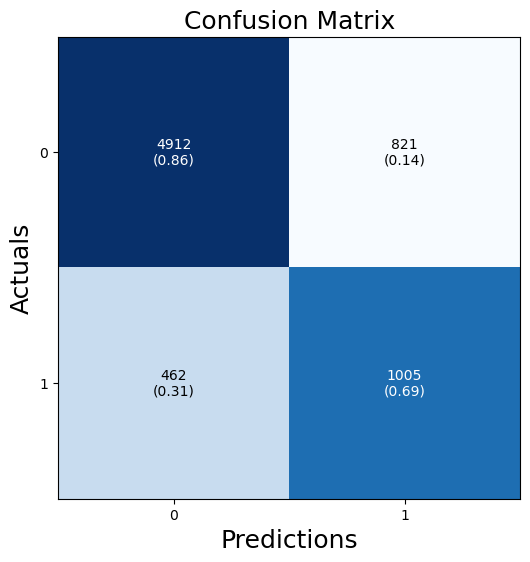


              precision    recall  f1-score   support

           0       0.91      0.86      0.88      5733
           1       0.55      0.69      0.61      1467

    accuracy                           0.82      7200
   macro avg       0.73      0.77      0.75      7200
weighted avg       0.84      0.82      0.83      7200



In [162]:
eval_metric(early_model, X_train_ready, y_train, X_val_ready, y_val)

25/25 [==============================] - 0s 1ms/step


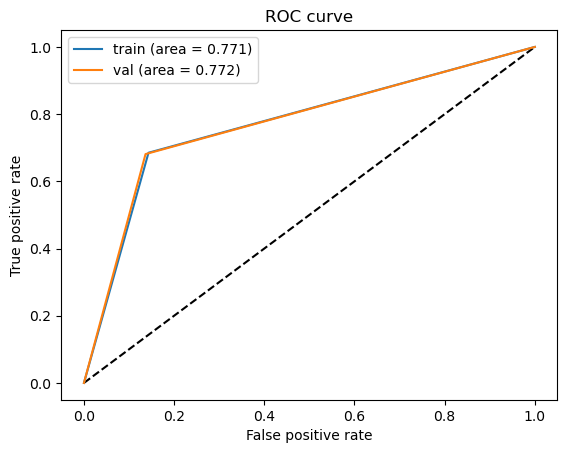

In [163]:
roc_auc_plot(early_model, y_train, X_train_ready, y_val, X_val_ready)

No overfitting at all.

#### Monitor the "val_recall" as metric

In [178]:
early_stop_r = tf.keras.callbacks.EarlyStopping(monitor="val_recall", mode="max", verbose=1, patience=25,
                                           restore_best_weights=True)

In [179]:
early_model_r = create_m(X_train_ready)
early_model_r.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.Recall()])
early_model_r.fit(x=X_train_ready, y=y_train, batch_size=128, epochs=1000, class_weight = class_weight,
            callbacks=[early_stop_r], validation_data=(X_val_ready, y_val))

Epoch 1/1000
57/57 [==============================] - 1s 7ms/step - loss: 1.0814 - recall_11: 0.4969 - val_loss: 0.6683 - val_recall_11: 0.6748
Epoch 2/1000
57/57 [==============================] - 0s 3ms/step - loss: 1.0145 - recall_11: 0.6510 - val_loss: 0.6390 - val_recall_11: 0.6933
Epoch 3/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.9679 - recall_11: 0.6939 - val_loss: 0.5922 - val_recall_11: 0.6748
Epoch 4/1000
57/57 [==============================] - 0s 2ms/step - loss: 0.9360 - recall_11: 0.6994 - val_loss: 0.5363 - val_recall_11: 0.6442
Epoch 5/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.9122 - recall_11: 0.7198 - val_loss: 0.5004 - val_recall_11: 0.6319
Epoch 6/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.8832 - recall_11: 0.7362 - val_loss: 0.4656 - val_recall_11: 0.6319
Epoch 7/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.8479 - recall_11: 0.7464 - val_loss: 0.4203 - val_recall_11:

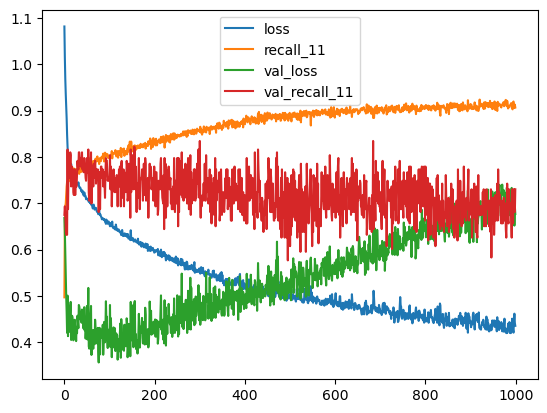

In [180]:
loss_df_early_r = pd.DataFrame(early_model_r.history.history)
loss_df_early_r.plot();

25/25 [==============================] - 0s 1ms/step
	Test_Set



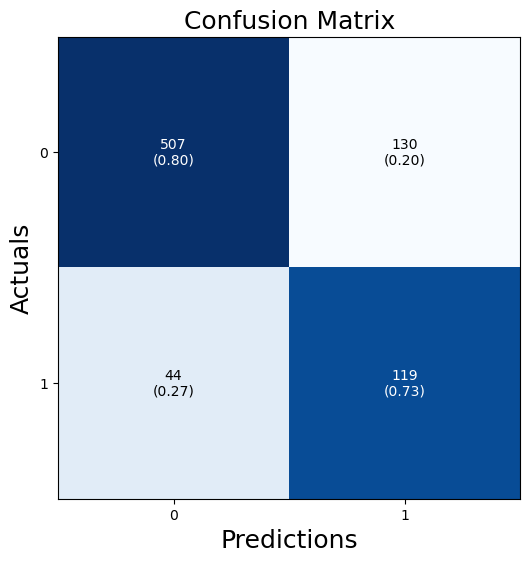

              precision    recall  f1-score   support

           0       0.92      0.80      0.85       637
           1       0.48      0.73      0.58       163

    accuracy                           0.78       800
   macro avg       0.70      0.76      0.72       800
weighted avg       0.83      0.78      0.80       800


	Train_Set



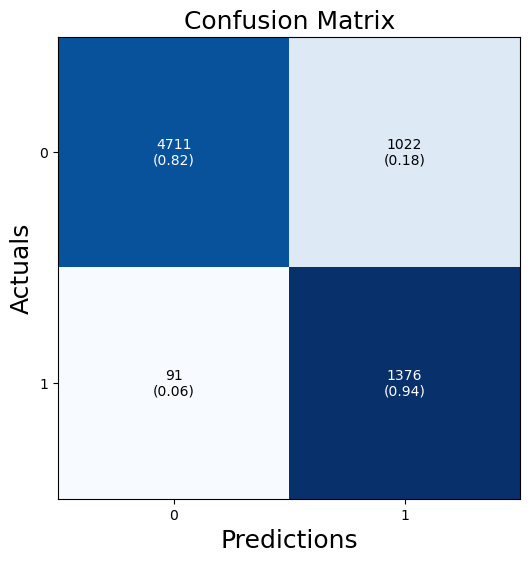


              precision    recall  f1-score   support

           0       0.98      0.82      0.89      5733
           1       0.57      0.94      0.71      1467

    accuracy                           0.85      7200
   macro avg       0.78      0.88      0.80      7200
weighted avg       0.90      0.85      0.86      7200



In [181]:
eval_metric(early_model_r, X_train_ready, y_train, X_val_ready, y_val)

25/25 [==============================] - 0s 1ms/step


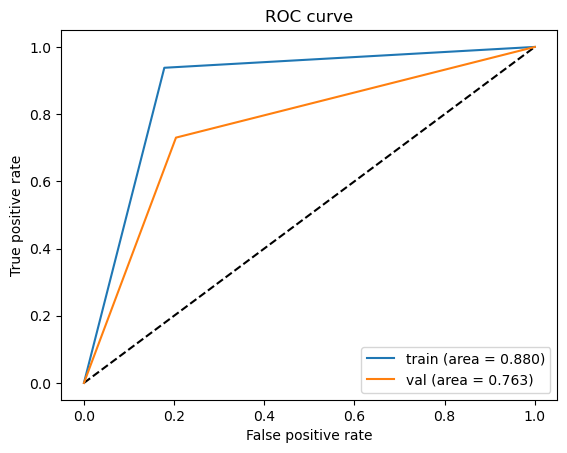

In [182]:
roc_auc_plot(early_model_r, y_train, X_train_ready, y_val, X_val_ready)

## Optuna

In [183]:
#batch_size = 64


def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 2, 128)
    n_units2 = trial.suggest_int("n_units2", 2, 128)
    n_units3 = trial.suggest_int("n_units3", 2, 128)
    n_units4 = trial.suggest_int("n_units4", 2, 128)
    
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-3, 1.3e-1)

    tf.random.set_seed(42)
    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train_ready.shape[1], activation="relu"))
    model.add(Dense(n_units2, activation="relu"))
    model.add(Dense(n_units3, activation="relu"))
    model.add(Dense(n_units4, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[tf.keras.metrics.Recall()],
    )
    return model


def objective(trial):
    model = create_model(trial)
    #suggest_float(..., log=True)
    w0 = trial.suggest_float("w0", 0.01, 5, log = True)
    w1 = trial.suggest_float("w1", 1, 5, log = True)
    model.fit(
        X_train_ready,
        y_train,
        validation_data=(X_val_ready, y_val),
        batch_size=128,
        epochs=500,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = model.evaluate(X_val_ready, y_val, verbose=0)[1]
    return score

In [184]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)
study.best_params

[I 2023-10-28 23:04:06,797] A new study created in memory with name: no-name-b74785c4-87b7-41a0-b1a4-ba4411a80f42
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adam.Adam'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.rmsprop.RMSprop'>

Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-10-28 23:04:12,231] Trial 0 finished with value: 0.5276073813438416 and parameters: {'n_units1': 120, 'n_units2': 115, 'n_units3': 20, 'n_units4': 57, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.002162345695626669, 'w0': 0.3568374547869068, 'w1': 2.0762078468554623}. Best is trial 0 with value: 0.5276073813438416.
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adam.Adam'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs

Restoring model weights from the end of the best epoch: 62.
Epoch 87: early stopping


[I 2023-10-28 23:04:24,219] Trial 1 finished with value: 0.47239264845848083 and parameters: {'n_units1': 101, 'n_units2': 10, 'n_units3': 112, 'n_units4': 7, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0011782817446680078, 'w0': 4.486548164853239, 'w1': 4.3381462295391575}. Best is trial 0 with value: 0.5276073813438416.
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adam.Adam'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\c

Restoring model weights from the end of the best epoch: 236.
Epoch 261: early stopping


[I 2023-10-28 23:05:06,012] Trial 2 finished with value: 0.46625766158103943 and parameters: {'n_units1': 77, 'n_units2': 111, 'n_units3': 82, 'n_units4': 80, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.06287785546263176, 'w0': 4.188661470747193, 'w1': 3.173169875615334}. Best is trial 0 with value: 0.5276073813438416.
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adam.Adam'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cu

Restoring model weights from the end of the best epoch: 22.
Epoch 47: early stopping


[I 2023-10-28 23:05:13,171] Trial 3 finished with value: 1.0 and parameters: {'n_units1': 30, 'n_units2': 11, 'n_units3': 16, 'n_units4': 83, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0032566108856715336, 'w0': 0.21980194662020658, 'w1': 1.118653619930951}. Best is trial 3 with value: 1.0.
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adam.Adam'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenvBefore\lib\site-package

Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-10-28 23:05:18,175] Trial 4 finished with value: 1.0 and parameters: {'n_units1': 96, 'n_units2': 14, 'n_units3': 62, 'n_units4': 65, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.00210237746902675, 'w0': 0.114397941756065, 'w1': 2.4706727353629265}. Best is trial 3 with value: 1.0.
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adam.Adam'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\o

Restoring model weights from the end of the best epoch: 9.
Epoch 34: early stopping


[I 2023-10-28 23:05:25,403] Trial 5 finished with value: 0.9325153231620789 and parameters: {'n_units1': 61, 'n_units2': 44, 'n_units3': 94, 'n_units4': 78, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.016053356889740147, 'w0': 0.3025605699786455, 'w1': 4.787853464648359}. Best is trial 3 with value: 1.0.
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adam.Adam'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenvBefore\lib\site-

Restoring model weights from the end of the best epoch: 34.
Epoch 59: early stopping


[I 2023-10-28 23:05:35,333] Trial 6 finished with value: 0.25766870379447937 and parameters: {'n_units1': 83, 'n_units2': 88, 'n_units3': 49, 'n_units4': 23, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.09020567579619622, 'w0': 1.6588717811905016, 'w1': 1.9654277073213644}. Best is trial 3 with value: 1.0.
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adam.Adam'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenvBefore\lib\site-p

Restoring model weights from the end of the best epoch: 18.
Epoch 43: early stopping


[I 2023-10-28 23:05:42,676] Trial 7 finished with value: 0.7975460290908813 and parameters: {'n_units1': 47, 'n_units2': 117, 'n_units3': 15, 'n_units4': 95, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.08557583576311979, 'w0': 0.029835114789319946, 'w1': 1.8336515887979399}. Best is trial 3 with value: 1.0.
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adam.Adam'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenvBefore\li

Restoring model weights from the end of the best epoch: 18.
Epoch 43: early stopping


[I 2023-10-28 23:05:51,315] Trial 8 finished with value: 0.48466256260871887 and parameters: {'n_units1': 98, 'n_units2': 49, 'n_units3': 33, 'n_units4': 117, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.08087904932678429, 'w0': 0.329848180406229, 'w1': 1.72710086565832}. Best is trial 3 with value: 1.0.
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adam.Adam'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenvBefore\lib\site-p

Restoring model weights from the end of the best epoch: 18.
Epoch 43: early stopping


[I 2023-10-28 23:05:58,621] Trial 9 finished with value: 0.9509202241897583 and parameters: {'n_units1': 29, 'n_units2': 53, 'n_units3': 54, 'n_units4': 120, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.058976197725576295, 'w0': 0.06143252416475049, 'w1': 2.2569193263386533}. Best is trial 3 with value: 1.0.
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adam.Adam'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenvBefore\li

Restoring model weights from the end of the best epoch: 29.
Epoch 54: early stopping


[I 2023-10-28 23:06:07,139] Trial 10 finished with value: 1.0 and parameters: {'n_units1': 2, 'n_units2': 28, 'n_units3': 34, 'n_units4': 37, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.006599291315187502, 'w0': 0.011535938995477562, 'w1': 1.0360964245376554}. Best is trial 3 with value: 1.0.
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adam.Adam'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optun

Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-10-28 23:06:11,674] Trial 11 finished with value: 1.0 and parameters: {'n_units1': 25, 'n_units2': 11, 'n_units3': 2, 'n_units4': 61, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.002918191815399779, 'w0': 0.09770649103812362, 'w1': 1.0175815005625763}. Best is trial 3 with value: 1.0.
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adam.Adam'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenvBefore\lib\site-package

Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-10-28 23:06:16,754] Trial 12 finished with value: 0.6748466491699219 and parameters: {'n_units1': 124, 'n_units2': 3, 'n_units3': 73, 'n_units4': 99, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.001063230363318478, 'w0': 0.121618640242657, 'w1': 1.328023396253602}. Best is trial 3 with value: 1.0.
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adam.Adam'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenvBefore\lib

Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-10-28 23:07:30,104] Trial 14 finished with value: 1.0 and parameters: {'n_units1': 15, 'n_units2': 79, 'n_units3': 60, 'n_units4': 79, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0078937753984335, 'w0': 0.13881297852723082, 'w1': 1.4470224309331938}. Best is trial 3 with value: 1.0.
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adam.Adam'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenvBefore\lib\site-packages

Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-10-28 23:07:34,956] Trial 15 finished with value: 1.0 and parameters: {'n_units1': 101, 'n_units2': 30, 'n_units3': 40, 'n_units4': 94, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.001992911684555401, 'w0': 0.05317423503996463, 'w1': 2.652671922616936}. Best is trial 3 with value: 1.0.
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adam.Adam'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenvBefore\lib\site-packag

Restoring model weights from the end of the best epoch: 12.
Epoch 37: early stopping


[I 2023-10-28 23:08:59,532] Trial 17 finished with value: 0.89570552110672 and parameters: {'n_units1': 78, 'n_units2': 16, 'n_units3': 76, 'n_units4': 70, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.015160391452722627, 'w0': 0.2093016619342556, 'w1': 3.320968375674724}. Best is trial 3 with value: 1.0.
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adam.Adam'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenvBefore\lib\site-p

Restoring model weights from the end of the best epoch: 16.
Epoch 41: early stopping


[I 2023-10-28 23:09:06,477] Trial 18 finished with value: 0.8711656332015991 and parameters: {'n_units1': 43, 'n_units2': 34, 'n_units3': 18, 'n_units4': 110, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.005201163537464438, 'w0': 0.17125426631900836, 'w1': 1.6423871955194744}. Best is trial 3 with value: 1.0.
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adam.Adam'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenvBefore\lib\sit

Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-10-28 23:09:11,099] Trial 19 finished with value: 1.0 and parameters: {'n_units1': 33, 'n_units2': 59, 'n_units3': 2, 'n_units4': 30, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.0015626209277480754, 'w0': 0.06866587400037492, 'w1': 1.1962308382337978}. Best is trial 3 with value: 1.0.


{'n_units1': 30,
 'n_units2': 11,
 'n_units3': 16,
 'n_units4': 83,
 'optimizer': keras.src.optimizers.adadelta.Adadelta,
 'learning_rate': 0.0032566108856715336,
 'w0': 0.21980194662020658,
 'w1': 1.118653619930951}

In [185]:
tuned_model = Sequential()
tuned_model.add(Dense(units=30, activation="relu", input_dim=X_train_ready.shape[1]))
tuned_model.add(Dense(units=11, activation="relu"))
tuned_model.add(Dense(units=16, activation="relu"))
tuned_model.add(Dense(units=83, activation="relu"))
tuned_model.add(Dense(units=1, activation = 'sigmoid'))

In [186]:

tuned_model.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate = 0.0032566108856715336)
                    , loss='binary_crossentropy',
                    metrics=[tf.keras.metrics.Recall()])#tf.keras.metrics.Recall()

In [187]:
history_tuned = tuned_model.fit(X_train_ready, y_train, batch_size=128, epochs=1000,
                                class_weight = {0: 0.21980194662020658, 1: 1.118653619930951},
                                validation_data=(X_val_ready, y_val))

Epoch 1/1000
57/57 [==============================] - 1s 6ms/step - loss: 0.2777 - recall_32: 1.0000 - val_loss: 0.7190 - val_recall_32: 1.0000
Epoch 2/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.2776 - recall_32: 1.0000 - val_loss: 0.7200 - val_recall_32: 1.0000
Epoch 3/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.2775 - recall_32: 1.0000 - val_loss: 0.7210 - val_recall_32: 1.0000
Epoch 4/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.2774 - recall_32: 1.0000 - val_loss: 0.7219 - val_recall_32: 1.0000
Epoch 5/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.2773 - recall_32: 1.0000 - val_loss: 0.7228 - val_recall_32: 1.0000
Epoch 6/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.2773 - recall_32: 1.0000 - val_loss: 0.7237 - val_recall_32: 1.0000
Epoch 7/1000
57/57 [==============================] - 0s 3ms/step - loss: 0.2772 - recall_32: 1.0000 - val_loss: 0.7244 - val_recall_32:

<Axes: >

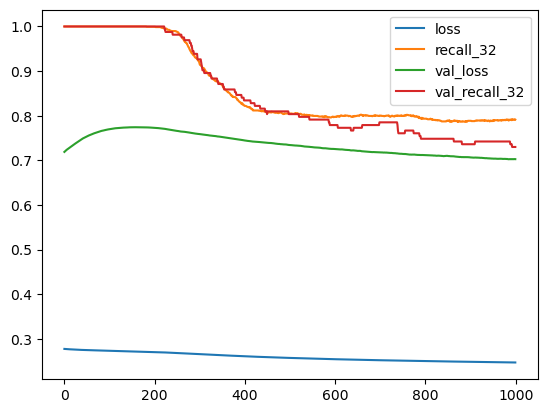

In [188]:
loss_df_tuned = pd.DataFrame(tuned_model.history.history)
loss_df_tuned.plot()

25/25 [==============================] - 0s 1ms/step
	Test_Set



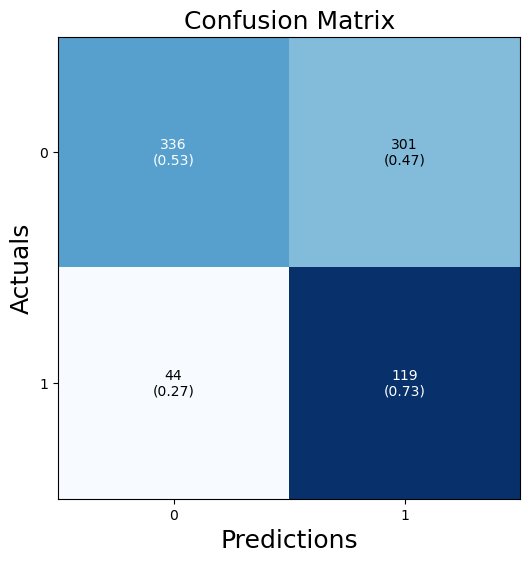

              precision    recall  f1-score   support

           0       0.88      0.53      0.66       637
           1       0.28      0.73      0.41       163

    accuracy                           0.57       800
   macro avg       0.58      0.63      0.53       800
weighted avg       0.76      0.57      0.61       800


	Train_Set



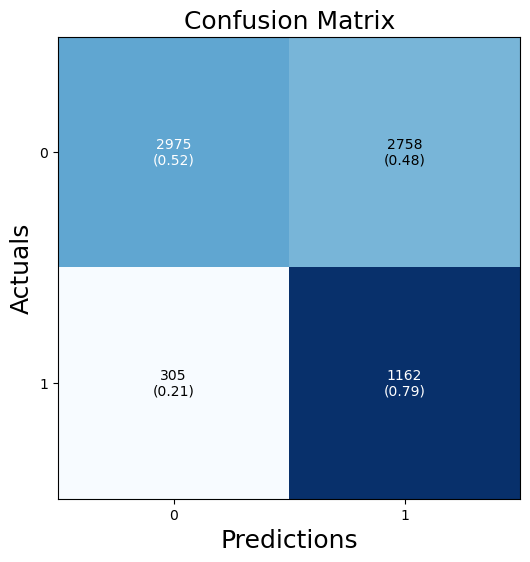


              precision    recall  f1-score   support

           0       0.91      0.52      0.66      5733
           1       0.30      0.79      0.43      1467

    accuracy                           0.57      7200
   macro avg       0.60      0.66      0.55      7200
weighted avg       0.78      0.57      0.61      7200



In [189]:
eval_metric(tuned_model, X_train_ready, y_train, X_val_ready, y_val)

25/25 [==============================] - 0s 1ms/step


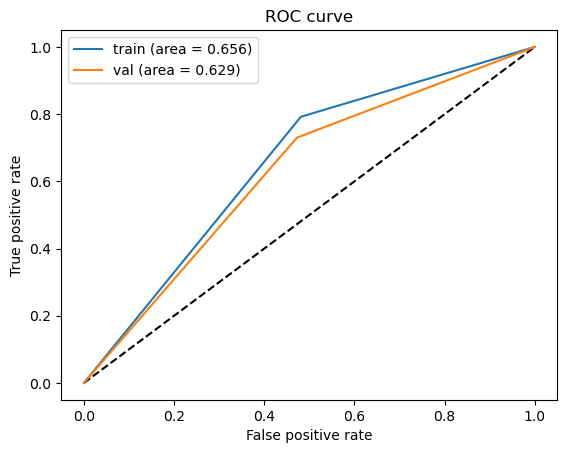

In [190]:
roc_auc_plot(tuned_model, y_train, X_train_ready, y_val, X_val_ready)

### Optuna for Balanced Dataset

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [191]:
def create_model_os(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 2, 128)
    n_units2 = trial.suggest_int("n_units2", 2, 128)
    n_units3 = trial.suggest_int("n_units3", 2, 128)
    n_units4 = trial.suggest_int("n_units4", 2, 128)
    
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_float("learning_rate", 1e-3, 1.3e-1, log = True)

    tf.random.set_seed(42)
    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train_os.shape[1], activation="relu"))
    model.add(Dense(n_units2, activation="relu"))
    model.add(Dense(n_units3, activation="relu"))
    model.add(Dense(n_units4, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=['accuracy'],
    )
    return model


def objective_os(trial):
    model = create_model_os(trial)
    #suggest_float(..., log=True)
    w0 = trial.suggest_float("w0", 0.01, 5, log = True)
    w1 = trial.suggest_float("w1", 0.01, 5, log = True)
    model.fit(
        X_train_os,
        y_train_os,
        validation_data=(X_val_ready, y_val),
        batch_size=128,
        epochs=500,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = model.evaluate(X_val_ready, y_val, verbose=0)[1]
    return score

In [193]:
study = optuna.create_study(direction="maximize")
study.optimize(objective_os, n_trials=20)
study.best_params

[I 2023-10-28 23:46:34,823] A new study created in memory with name: no-name-e90872ff-0618-48ab-b923-59991abc4d7b
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adam.Adam'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.rmsprop.RMSprop'>

Restoring model weights from the end of the best epoch: 12.
Epoch 37: early stopping


[I 2023-10-28 23:46:43,104] Trial 0 finished with value: 0.8537499904632568 and parameters: {'n_units1': 104, 'n_units2': 21, 'n_units3': 55, 'n_units4': 25, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.02045792897614352, 'w0': 0.05926928530438712, 'w1': 0.0359017527033287}. Best is trial 0 with value: 0.8537499904632568.
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adam.Adam'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenvB

Restoring model weights from the end of the best epoch: 13.
Epoch 38: early stopping


[I 2023-10-28 23:46:52,499] Trial 1 finished with value: 0.8062499761581421 and parameters: {'n_units1': 126, 'n_units2': 40, 'n_units3': 95, 'n_units4': 99, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.011461788263504889, 'w0': 2.4688538737522085, 'w1': 0.013481759586368795}. Best is trial 0 with value: 0.8537499904632568.
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adam.Adam'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\

Restoring model weights from the end of the best epoch: 7.
Epoch 32: early stopping


[I 2023-10-28 23:47:00,404] Trial 2 finished with value: 0.862500011920929 and parameters: {'n_units1': 83, 'n_units2': 68, 'n_units3': 59, 'n_units4': 123, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.048012497279518666, 'w0': 0.026732492194412927, 'w1': 0.011817038156923983}. Best is trial 2 with value: 0.862500011920929.
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adam.Adam'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\

Restoring model weights from the end of the best epoch: 14.
Epoch 39: early stopping


[I 2023-10-28 23:47:08,760] Trial 3 finished with value: 0.8762500286102295 and parameters: {'n_units1': 17, 'n_units2': 82, 'n_units3': 52, 'n_units4': 2, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.010963746311198258, 'w0': 0.04375542953798308, 'w1': 0.03153677126789423}. Best is trial 3 with value: 0.8762500286102295.
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adam.Adam'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cu

Restoring model weights from the end of the best epoch: 11.
Epoch 36: early stopping


[I 2023-10-28 23:47:18,433] Trial 4 finished with value: 0.8399999737739563 and parameters: {'n_units1': 87, 'n_units2': 81, 'n_units3': 109, 'n_units4': 63, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.04620798643268365, 'w0': 4.316201225186098, 'w1': 0.4688030782075756}. Best is trial 3 with value: 0.8762500286102295.
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adam.Adam'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenvBef

Restoring model weights from the end of the best epoch: 11.
Epoch 36: early stopping


[I 2023-10-28 23:47:27,460] Trial 5 finished with value: 0.8600000143051147 and parameters: {'n_units1': 55, 'n_units2': 4, 'n_units3': 38, 'n_units4': 56, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.015737873838177794, 'w0': 0.23802372564974444, 'w1': 0.018721217667666462}. Best is trial 3 with value: 0.8762500286102295.
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adam.Adam'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudae

Restoring model weights from the end of the best epoch: 56.
Epoch 81: early stopping


[I 2023-10-28 23:47:43,424] Trial 6 finished with value: 0.6349999904632568 and parameters: {'n_units1': 100, 'n_units2': 16, 'n_units3': 69, 'n_units4': 23, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.043962479535916615, 'w0': 0.11714810207162842, 'w1': 2.328316417773195}. Best is trial 3 with value: 0.8762500286102295.
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adam.Adam'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cu

Restoring model weights from the end of the best epoch: 22.
Epoch 47: early stopping


[I 2023-10-28 23:47:55,384] Trial 7 finished with value: 0.706250011920929 and parameters: {'n_units1': 50, 'n_units2': 117, 'n_units3': 75, 'n_units4': 86, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.017306022287992412, 'w0': 0.282595215608296, 'w1': 1.2355980371101842}. Best is trial 3 with value: 0.8762500286102295.
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adam.Adam'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenvBef

Restoring model weights from the end of the best epoch: 242.
Epoch 267: early stopping


[I 2023-10-28 23:48:57,649] Trial 8 finished with value: 0.8687499761581421 and parameters: {'n_units1': 101, 'n_units2': 107, 'n_units3': 66, 'n_units4': 86, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.035825218387830586, 'w0': 0.4735012747777536, 'w1': 0.14049122135245687}. Best is trial 3 with value: 0.8762500286102295.
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adam.Adam'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
D:\anacnda3\env

Restoring model weights from the end of the best epoch: 35.
Epoch 60: early stopping


[I 2023-10-28 23:49:12,607] Trial 9 finished with value: 0.8774999976158142 and parameters: {'n_units1': 54, 'n_units2': 60, 'n_units3': 56, 'n_units4': 109, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.05111438751637331, 'w0': 0.07677944438631512, 'w1': 0.025375215323437648}. Best is trial 9 with value: 0.8774999976158142.
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adam.Adam'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaen

Restoring model weights from the end of the best epoch: 1.
Epoch 26: early stopping


[I 2023-10-28 23:49:19,267] Trial 10 finished with value: 0.20374999940395355 and parameters: {'n_units1': 28, 'n_units2': 45, 'n_units3': 4, 'n_units4': 124, 'optimizer': <class 'keras.src.optimizers.adadelta.Adadelta'>, 'learning_rate': 0.12709611270817084, 'w0': 0.018650278500554375, 'w1': 0.11700791325782194}. Best is trial 9 with value: 0.8774999976158142.
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adam.Adam'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
D:\anacnda3\en

Restoring model weights from the end of the best epoch: 20.
Epoch 45: early stopping


[I 2023-10-28 23:49:30,177] Trial 11 finished with value: 0.38374999165534973 and parameters: {'n_units1': 2, 'n_units2': 94, 'n_units3': 31, 'n_units4': 9, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.004735591899349829, 'w0': 0.010070555589761467, 'w1': 0.05254428918443192}. Best is trial 9 with value: 0.8774999976158142.
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adam.Adam'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cuda

Restoring model weights from the end of the best epoch: 20.
Epoch 45: early stopping


[I 2023-10-28 23:49:39,777] Trial 12 finished with value: 0.875 and parameters: {'n_units1': 26, 'n_units2': 60, 'n_units3': 28, 'n_units4': 45, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.005033395194445451, 'w0': 0.05994764844906354, 'w1': 0.04651056987454996}. Best is trial 9 with value: 0.8774999976158142.
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adam.Adam'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenvBefore

Restoring model weights from the end of the best epoch: 8.
Epoch 33: early stopping


[I 2023-10-28 23:49:49,439] Trial 13 finished with value: 0.8612499833106995 and parameters: {'n_units1': 32, 'n_units2': 82, 'n_units3': 128, 'n_units4': 98, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.0016548937239309512, 'w0': 0.06996408416583882, 'w1': 0.03151440588571158}. Best is trial 9 with value: 0.8774999976158142.
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adam.Adam'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cuda

Restoring model weights from the end of the best epoch: 20.
Epoch 45: early stopping


[I 2023-10-28 23:49:59,091] Trial 14 finished with value: 0.20374999940395355 and parameters: {'n_units1': 11, 'n_units2': 54, 'n_units3': 47, 'n_units4': 3, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.11441876849284942, 'w0': 0.03210731822643641, 'w1': 0.09234741016422954}. Best is trial 9 with value: 0.8774999976158142.
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adam.Adam'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenv

Restoring model weights from the end of the best epoch: 3.
Epoch 28: early stopping


[I 2023-10-28 23:50:06,389] Trial 15 finished with value: 0.8337500095367432 and parameters: {'n_units1': 65, 'n_units2': 75, 'n_units3': 87, 'n_units4': 37, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.00670651196959965, 'w0': 0.13394785875227355, 'w1': 0.29019038048189566}. Best is trial 9 with value: 0.8774999976158142.
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adam.Adam'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\c

Restoring model weights from the end of the best epoch: 14.
Epoch 39: early stopping


[I 2023-10-28 23:50:16,608] Trial 16 finished with value: 0.8399999737739563 and parameters: {'n_units1': 45, 'n_units2': 97, 'n_units3': 19, 'n_units4': 77, 'optimizer': <class 'keras.src.optimizers.nadam.Nadam'>, 'learning_rate': 0.008473177495455309, 'w0': 0.010287166087281781, 'w1': 0.010088839023472972}. Best is trial 9 with value: 0.8774999976158142.
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adam.Adam'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cu

Restoring model weights from the end of the best epoch: 5.
Epoch 30: early stopping


[I 2023-10-28 23:52:10,682] Trial 18 finished with value: 0.8612499833106995 and parameters: {'n_units1': 40, 'n_units2': 33, 'n_units3': 86, 'n_units4': 49, 'optimizer': <class 'keras.src.optimizers.adam.Adam'>, 'learning_rate': 0.009566189757926686, 'w0': 0.5353048331315239, 'w1': 0.06929215585859572}. Best is trial 9 with value: 0.8774999976158142.
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adam.Adam'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenvBefore\lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains <class 'keras.src.optimizers.adadelta.Adadelta'> which is of type type.
  warnings.warn(message)
D:\anacnda3\envs\cudaenv

Restoring model weights from the end of the best epoch: 26.
Epoch 51: early stopping


[I 2023-10-28 23:52:22,249] Trial 19 finished with value: 0.8737499713897705 and parameters: {'n_units1': 73, 'n_units2': 91, 'n_units3': 20, 'n_units4': 73, 'optimizer': <class 'keras.src.optimizers.rmsprop.RMSprop'>, 'learning_rate': 0.0010897001865131561, 'w0': 0.11043303790474802, 'w1': 0.024176526344164794}. Best is trial 9 with value: 0.8774999976158142.


{'n_units1': 54,
 'n_units2': 60,
 'n_units3': 56,
 'n_units4': 109,
 'optimizer': keras.src.optimizers.adam.Adam,
 'learning_rate': 0.05111438751637331,
 'w0': 0.07677944438631512,
 'w1': 0.025375215323437648}

In [194]:
tuned_model_os = Sequential()
tuned_model_os.add(Dense(units=54, activation="relu", input_dim=X_train_os.shape[1]))
tuned_model_os.add(Dense(units=60, activation="relu"))
tuned_model_os.add(Dense(units=56, activation="relu"))
tuned_model_os.add(Dense(units=109, activation="relu"))
tuned_model_os.add(Dense(units=1, activation = 'sigmoid'))

In [195]:
tuned_model_os.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.05111438751637331)
                    , loss='binary_crossentropy',
                    metrics=['accuracy'])

In [196]:
history_tuned_os = tuned_model_os.fit(X_train_os, y_train_os, batch_size=128, epochs=1000,
                                class_weight = {0: 0.07677944438631512, 1: 0.025375215323437648},
                                validation_data=(X_val_ready, y_val))

Epoch 1/1000
90/90 [==============================] - 1s 4ms/step - loss: 0.0269 - accuracy: 0.5523 - val_loss: 0.4130 - val_accuracy: 0.8250
Epoch 2/1000
90/90 [==============================] - 0s 3ms/step - loss: 0.0245 - accuracy: 0.5833 - val_loss: 0.4095 - val_accuracy: 0.8087
Epoch 3/1000
90/90 [==============================] - 0s 3ms/step - loss: 0.0246 - accuracy: 0.5908 - val_loss: 0.4075 - val_accuracy: 0.7975
Epoch 4/1000
90/90 [==============================] - 0s 3ms/step - loss: 0.0245 - accuracy: 0.5964 - val_loss: 0.4101 - val_accuracy: 0.8138
Epoch 5/1000
90/90 [==============================] - 0s 3ms/step - loss: 0.0243 - accuracy: 0.6138 - val_loss: 0.4124 - val_accuracy: 0.8225
Epoch 6/1000
90/90 [==============================] - 0s 3ms/step - loss: 0.0242 - accuracy: 0.6139 - val_loss: 0.4307 - val_accuracy: 0.7912
Epoch 7/1000
90/90 [==============================] - 0s 3ms/step - loss: 0.0240 - accuracy: 0.6413 - val_loss: 0.4418 - val_accuracy: 0.8025
Epoch 

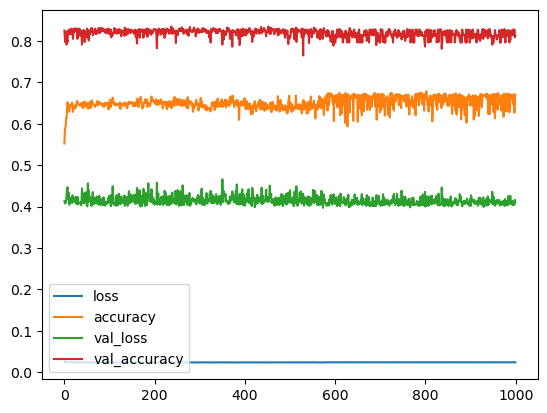

In [197]:
loss_df_tuned_model_os = pd.DataFrame(tuned_model_os.history.history)
loss_df_tuned_model_os.plot();

25/25 [==============================] - 0s 1ms/step
	Test_Set



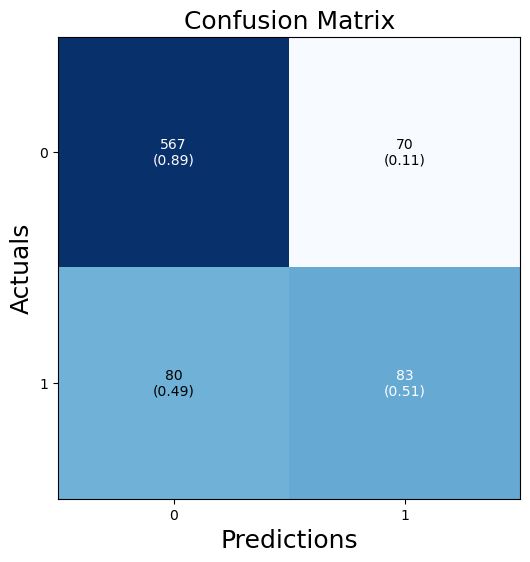

              precision    recall  f1-score   support

           0       0.88      0.89      0.88       637
           1       0.54      0.51      0.53       163

    accuracy                           0.81       800
   macro avg       0.71      0.70      0.70       800
weighted avg       0.81      0.81      0.81       800


	Train_Set



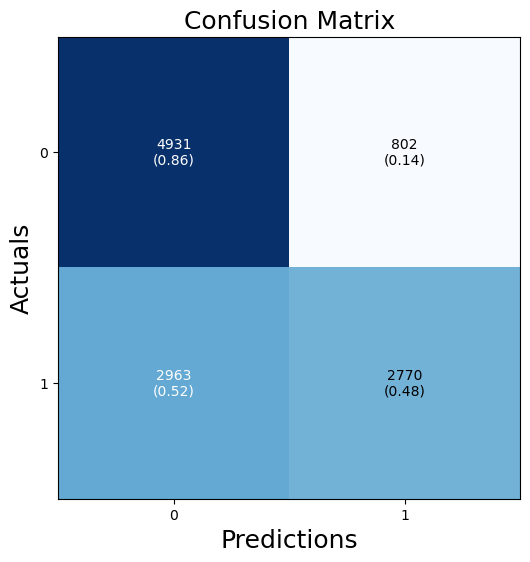


              precision    recall  f1-score   support

           0       0.62      0.86      0.72      5733
           1       0.78      0.48      0.60      5733

    accuracy                           0.67     11466
   macro avg       0.70      0.67      0.66     11466
weighted avg       0.70      0.67      0.66     11466



In [198]:
eval_metric(tuned_model_os, X_train_os, y_train_os, X_val_ready, y_val)

25/25 [==============================] - 0s 1ms/step


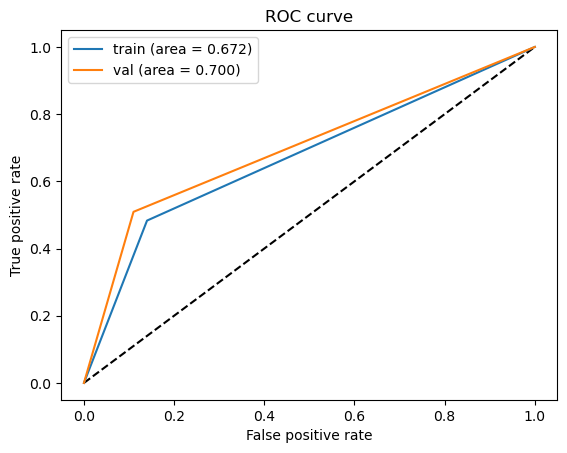

In [199]:
roc_auc_plot(tuned_model_os, y_train_os, X_train_os, y_val, X_val_ready)

The model with oversampling has the most balanced results.

# Final Model and Model Deployment

The model tuned with Optuna and trained on the oversampled dataset has the most balanced results.

In [200]:
#saving the transformer
pickle.dump(cols_trans, open("column_transformer", "wb"))

In [202]:
#saving the model
tuned_model_os.save('customer_churn_model.keras')

## Prediction

In [204]:
#doing predictions on the entire test set
X_test_ready = cols_trans.transform(X_test)
y_pred = tuned_model_os.predict(X_test_ready) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1368  225]
 [ 202  205]]
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1593
           1       0.48      0.50      0.49       407

    accuracy                           0.79      2000
   macro avg       0.67      0.68      0.68      2000
weighted avg       0.79      0.79      0.79      2000



___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

### References:
    
- https://stackoverflow.com/questions/38664487/neural-network-working-with-a-imbalanced-dataset

- https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model

- https://datascience.stackexchange.com/questions/13490/how-to-set-class-weights-for-imbalanced-classes-in-keras/18722#18722

- https://stackoverflow.com/questions/55548675/difference-between-balanced-accuracy-score-and-accuracy-score#:~:text=Accuracy%20%3D%20tp%2Btn%2F%20%28tp%2Btn%2Bfp%2Bfn%29%20doesn%27t%20work%20well%20for,negative%20rate%3D%20tn%2F%20%28tn%2Bfp%29%20%3A%20also%20caled%20%27specificity%27

- https://stackoverflow.com/questions/61529293/how-to-find-the-roc-curve-and-auc-score-of-this-cnn-model-keras

- https://www.tensorflow.org/tutorials/structured_data/imbalanced_data